In [2]:
import h5py
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
from pathlib import Path
import pyfftw

import bacco

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import plotter
import plot_utils
import utils
import compute_statistics as cs
import data_loader
import generate_params as genp

%load_ext autoreload
%autoreload 2

2026-01-12 14:38:30.971234: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-12 14:38:31.074561: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-12 14:38:31.074602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-12 14:38:31.087442: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-12 14:38:31.117599: I tensorflow/core/platform/cpu_feature_guar

# Investigate multiplicative noise model

Anmult p2 for chi2

In [ ]:
data_mode = 'muchisimocks'
statistics = ['pk', 'bispec']
#statistics = ['pk']

### train
tag_params = '_p5_n10000'
tag_biasparams = '_biaszen_p4_n10000'
tag_noise = '_noise_unit_p5_n10000'
tag_Anoise = '_Anmult_p2_n10000'
### test
# tag_params = '_test_p5_n1000'
# tag_biasparams = '_biaszen_p4_n1000'
# tag_noise = '_noise_unit_test_p5_n1000'
# tag_Anoise = '_Anmult_p2_n1000'
## cosmic variance (quijote)
# tag_params="_quijote_p0_n1000"
# tag_biasparams="_b1000_p0_n1"
# tag_noise="_noise_quijote_p0_n1000"
# tag_Anoise="_An1_p0_n1"
tag_datagen = ''
kwargs_data = {
    'tag_datagen': tag_datagen
}

tag_stats = f'_{"_".join(statistics)}'    
tag_data = '_'+data_mode + tag_stats + tag_params + tag_biasparams + tag_datagen
k_arr, y_arr, y_err, idxs_params, params_df, param_dict_fixed, biasparams_df, biasparams_dict_fixed, Anoise_df, Anoise_dict_fixed, random_ints, random_ints_bias = \
            data_loader.load_data(data_mode, statistics, 
                                    tag_params, tag_biasparams,
                                    tag_noise=tag_noise, tag_Anoise=tag_Anoise,
                                    tag_data=tag_data,
                                    kwargs=kwargs_data)
            
print(y_arr[0].shape)
#print(y_arr[1].shape)

dir_statistics: /scratch/kstoreyf/muchisimocks/data/pks_mlib/pks_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p2_n10000
Loading muchisimocks data from /scratch/kstoreyf/muchisimocks/data/pks_mlib/pks_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p2_n10000
Found 10000 diff cosmo pks in /scratch/kstoreyf/muchisimocks/data/pks_mlib/pks_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p2_n10000
Loaded pk data with shape (10000, 30)
fn_mask: ../data/masks/mask_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n10000.txt
Loading from ../data/masks/mask_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n10000.txt (already exists)
Masked 1 out of 30 bins
(29,) (10000, 30) (10000, 30) (30,)
dir_statistics: /scratch/kstoreyf/muchisimocks/data/bispecs_mlib/bispecs_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p2_n10000
Loading muchisimocks data from /scratch/kstoreyf/muchisimocks/data/bispecs_mlib/bispecs_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p2_n10000


In [3]:
mask = data_loader.get_Pk_mask(tag_data)

fn_mask: ../data/masks/mask_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n10000.txt
Loading from ../data/masks/mask_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n10000.txt (already exists)


In [4]:
theta, param_names = data_loader.param_dfs_to_theta(idxs_params, params_df, biasparams_df, Anoise_df=Anoise_df)

Anmult p5 for chi2:

In [5]:
data_mode = 'muchisimocks'
statistics = ['pk', 'bispec']
#statistics = ['pk']

### train
tag_params = '_p5_n10000'
tag_biasparams = '_biaszen_p4_n10000'
tag_noise = '_noise_unit_p5_n10000'
tag_Anoise = '_Anmult_p5_n10000'
### test
# tag_params = '_test_p5_n1000'
# tag_biasparams = '_biaszen_p4_n1000'
# tag_noise = '_noise_unit_test_p5_n1000'
# tag_Anoise = '_Anmult_p5_n1000'
## cosmic variance (quijote)
# tag_params="_quijote_p0_n1000"
# tag_biasparams="_b1000_p0_n1"
# tag_noise="_noise_quijote_p0_n1000"
# tag_Anoise="_An1_p0_n1"
tag_datagen = ''
kwargs_data = {
    'tag_datagen': tag_datagen
}

tag_stats = f'_{"_".join(statistics)}'    
tag_data = '_'+data_mode + tag_stats + tag_params + tag_biasparams + tag_datagen
k_arr_np5, y_arr_np5, y_err_np5, idxs_params_np5, params_df_np5, param_dict_fixed_np5, biasparams_df_np5, biasparams_dict_fixed_np5, Anoise_df_np5, Anoise_dict_fixed_np5, random_ints_np5, random_ints_bias_np5 = \
            data_loader.load_data(data_mode, statistics, 
                                    tag_params, tag_biasparams,
                                    tag_noise=tag_noise, tag_Anoise=tag_Anoise,
                                    tag_data=tag_data,
                                    kwargs=kwargs_data)
            
print(y_arr_np5[0].shape)
#print(y_arr[1].shape)

dir_statistics: /scratch/kstoreyf/muchisimocks/data/pks_mlib/pks_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p5_n10000
Loading muchisimocks data from /scratch/kstoreyf/muchisimocks/data/pks_mlib/pks_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p5_n10000
Found 10000 diff cosmo pks in /scratch/kstoreyf/muchisimocks/data/pks_mlib/pks_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p5_n10000
Loaded pk data with shape (10000, 30)
fn_mask: ../data/masks/mask_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n10000.txt
Loading from ../data/masks/mask_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n10000.txt (already exists)
Masked 1 out of 30 bins
(29,) (10000, 30) (10000, 30) (30,)
dir_statistics: /scratch/kstoreyf/muchisimocks/data/bispecs_mlib/bispecs_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p5_n10000
Loading muchisimocks data from /scratch/kstoreyf/muchisimocks/data/bispecs_mlib/bispecs_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p5_n10000


In [6]:
theta_np5, param_names_np5 = data_loader.param_dfs_to_theta(idxs_params_np5, params_df_np5, biasparams_df_np5, Anoise_df=Anoise_df_np5)

In [7]:
data_mode_test = 'shame'
tag_mock = '_nbar0.00022'
tag_data_train = None # this is used for mask; we get it below 
statistics = ['pk', 'bispec']
k_mock, y_mock, y_err_mock = data_loader.load_data_ood(data_mode_test, statistics, tag_mock, tag_data=tag_data_train)

Loaded pk with shape (30,)
Loaded pk data with shape (30,)
No tag_data provided, so not masking data
Loaded bispec with shape (50,)
Loaded bispec data with shape (50,)
No tag_data provided, so not masking data


In [11]:
# unpack the stats
k_pk = k_arr[statistics.index('pk')]
y_pk = y_arr[statistics.index('pk')]

k_bispec = k_arr[statistics.index('bispec')]
y_bispec = y_arr[statistics.index('bispec')]

k_pk_np5 = k_arr_np5[statistics.index('pk')]
y_pk_np5 = y_arr_np5[statistics.index('pk')]

k_bispec_np5 = k_arr_np5[statistics.index('bispec')]
y_bispec_np5 = y_arr_np5[statistics.index('bispec')]

pk_shame = y_mock[0][mask]
bispec_shame = y_mock[1]

### chi2, with standard dev of training set as error

In [12]:
pk_mean_lh_np2 = np.mean(y_pk, axis=0)
pk_p16_lh_np2 = np.percentile(y_pk, 16, axis=0)
pk_p84_lh_np2 = np.percentile(y_pk, 84, axis=0)
pk_err_lh_np2 = (pk_p84_lh_np2 - pk_p16_lh_np2)/2

In [13]:
pk_mean_lh_np5 = np.mean(y_pk_np5, axis=0)
pk_p16_lh_np5 = np.percentile(y_pk_np5, 16, axis=0)
pk_p84_lh_np5 = np.percentile(y_pk_np5, 84, axis=0)
pk_err_lh_np5 = (pk_p84_lh_np5 - pk_p16_lh_np5)/2

In [14]:
bispec_mean_lh_np2 = np.mean(y_bispec, axis=0)
bispec_p16_lh_np2 = np.percentile(y_bispec, 16, axis=0)
bispec_p84_lh_np2 = np.percentile(y_bispec, 84, axis=0)
bispec_err_lh_np2 = (bispec_p84_lh_np2 - bispec_p16_lh_np2)/2

In [15]:
bispec_mean_lh_np5 = np.mean(y_bispec_np5, axis=0)
bispec_p16_lh_np5 = np.percentile(y_bispec_np5, 16, axis=0)
bispec_p84_lh_np5 = np.percentile(y_bispec_np5, 84, axis=0)
bispec_err_lh_np5 = (bispec_p84_lh_np5 - bispec_p16_lh_np5)/2

In [16]:
# Compute chi2 between shame mock and all test power spectra
chi2_values_pk = np.zeros(y_pk.shape[0])

for i in range(y_pk.shape[0]):
    pk_test = y_pk[i]
    chi2_values_pk[i] = np.sum((pk_test - pk_shame)**2/pk_err_lh_np2**2)  
# Find minimum chi2
idx_min_pk = np.argmin(chi2_values_pk)
min_chi2_pk = chi2_values_pk[idx_min_pk]
print(idx_min_pk, min_chi2_pk)

4690 0.16242498681424436


In [17]:
# Compute chi2 between shame mock and all test power spectra
chi2_values_bispec = np.zeros(y_bispec.shape[0])

for i in range(y_bispec.shape[0]):
    bispec_test = y_bispec[i]
    chi2_values_bispec[i] = np.sum((bispec_test - bispec_shame)**2/bispec_err_lh_np2**2)  
# Find minimum chi2
idx_min_bispec = np.argmin(chi2_values_bispec)
min_chi2_bispec = chi2_values_bispec[idx_min_bispec]
print(idx_min_bispec, min_chi2_bispec)

9972 0.007531619695726023


In [18]:
# Compute chi2 between shame mock and all test power spectra
chi2_values_pk_bispec = np.zeros(y_bispec.shape[0])
pk_bispec_shame = np.concatenate([pk_shame, bispec_shame])

for i in range(y_bispec.shape[0]):
    pk_bispec_test = np.concatenate([y_pk[i], y_bispec[i]])
    chi2_values_pk_bispec[i] = np.sum((pk_bispec_test - pk_bispec_shame)**2/np.concatenate([pk_err_lh_np2, bispec_err_lh_np2])**2) 
# Find minimum chi2
idx_min_pk_bispec = np.argmin(chi2_values_pk_bispec)
min_chi2_pk_bispec = chi2_values_pk_bispec[idx_min_pk_bispec]
print(idx_min_pk_bispec, min_chi2_pk_bispec)

8803 0.3404362027509944


In [19]:
# Compute chi2 between shame mock and all test power spectra
chi2_values_pk_np5 = np.zeros(y_pk_np5.shape[0])

for i in range(y_pk_np5.shape[0]):
    pk_test = y_pk_np5[i]
    chi2_values_pk_np5[i] = np.sum((pk_test - pk_shame)**2/pk_err_lh_np5**2)  # avoid division by zero
# Find minimum chi2
idx_min_pk_np5 = np.argmin(chi2_values_pk_np5)
min_chi2_pk_np5 = chi2_values_pk_np5[idx_min_pk_np5]
print(idx_min_pk_np5, min_chi2_pk_np5)

8524 0.21285261952208864


In [20]:
# Compute chi2 between shame mock and all test power spectra
chi2_values_bispec_np5 = np.zeros(y_bispec_np5.shape[0])

for i in range(y_bispec_np5.shape[0]):
    bispec_test = y_bispec_np5[i]
    chi2_values_bispec_np5[i] = np.sum((bispec_test - bispec_shame)**2/bispec_err_lh_np5**2)  # avoid division by zero
# Find minimum chi2
idx_min_bispec_np5 = np.argmin(chi2_values_bispec_np5)
min_chi2_bispec_np5 = chi2_values_bispec_np5[idx_min_bispec_np5]
#print((y_pk[min_idx] - pk_shame)/(pk_shame))
print(idx_min_bispec_np5, min_chi2_bispec_np5)

197 0.004586738094565856


In [21]:
# Compute chi2 between shame mock and all test power spectra
chi2_values_pk_bispec_np5 = np.zeros(y_bispec_np5.shape[0])

for i in range(y_bispec_np5.shape[0]):
    pk_bispec_test = np.concatenate([y_pk_np5[i], y_bispec_np5[i]])
    pk_bispec_shame = np.concatenate([pk_shame, bispec_shame])
    chi2_values_pk_bispec_np5[i] = np.sum((pk_bispec_test - pk_bispec_shame)**2/np.concatenate([pk_err_lh_np5, bispec_err_lh_np5])**2)  # avoid division by zero
# Find minimum chi2
idx_min_pk_bispec_np5 = np.argmin(chi2_values_pk_bispec_np5)
min_chi2_pk_bispec_np5 = chi2_values_pk_bispec_np5[idx_min_pk_bispec_np5]
print(idx_min_pk_bispec_np5, min_chi2_pk_bispec_np5)

2316 0.25184035293914175


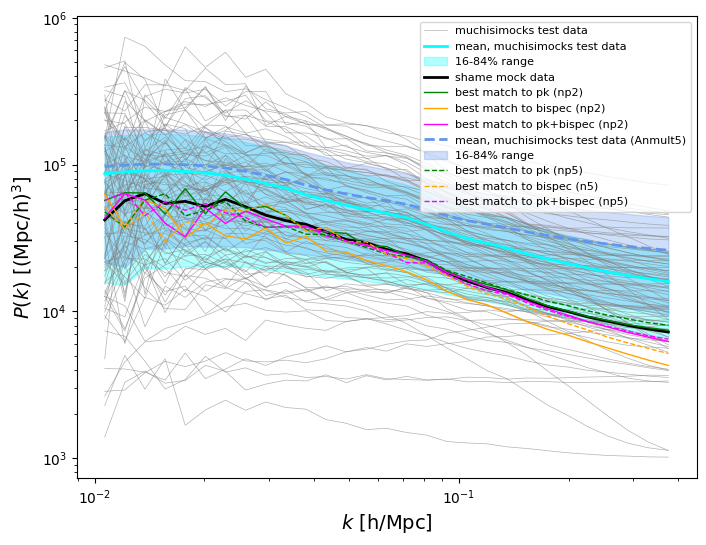

In [22]:

plt.figure(figsize=(8,6))

n_plot = np.min([100, y_pk.shape[0]])
first = True
for i in range(n_plot):
    if first:
        label = 'muchisimocks test data'
        first = False
    else:
        label = None
    plt.plot(k_pk, y_pk[i], color='grey', alpha=0.6, lw=0.5, label=label)

mean = np.mean(y_pk, axis=0)
p16 = np.percentile(y_pk, 16, axis=0)
p84 = np.percentile(y_pk, 84, axis=0)

plt.plot(k_pk, mean, color='cyan', lw=2, label='mean, muchisimocks test data')
plt.fill_between(k_pk, p16, p84, color='cyan', alpha=0.3, label=r'16-84% range')

plt.plot(k_mock[0][mask], y_mock[0][mask], color='black', lw=2, label='shame mock data')
plt.plot(k_pk, y_pk[idx_min_pk], color='green', lw=1, label='best match to pk (np2)')
plt.plot(k_pk, y_pk[idx_min_bispec], color='orange', lw=1, label='best match to bispec (np2)')
plt.plot(k_pk, y_pk[idx_min_pk_bispec], color='magenta', lw=1, label='best match to pk+bispec (np2)')

## Anmult p5

mean = np.mean(y_pk_np5, axis=0)
p16 = np.percentile(y_pk_np5, 16, axis=0)
p84 = np.percentile(y_pk_np5, 84, axis=0)
plt.plot(k_pk_np5, mean, color='cornflowerblue', lw=2, ls='--', label='mean, muchisimocks test data (Anmult5)')
plt.fill_between(k_pk_np5, p16, p84, color='cornflowerblue', alpha=0.3, label=r'16-84% range')
plt.plot(k_pk_np5, y_pk_np5[idx_min_pk_np5], color='green', lw=1, ls='--', label='best match to pk (np5)')
plt.plot(k_pk_np5, y_pk_np5[idx_min_bispec_np5], color='orange', lw=1, ls='--', label='best match to bispec (n5)')
plt.plot(k_pk_np5, y_pk_np5[idx_min_pk_bispec_np5], color='magenta', lw=1, ls='--', label='best match to pk+bispec (np5)')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ [h/Mpc]', fontsize=14)
plt.ylabel(r'$P(k)$ [(Mpc/h)$^3$]', fontsize=14)
plt.legend(fontsize=8)

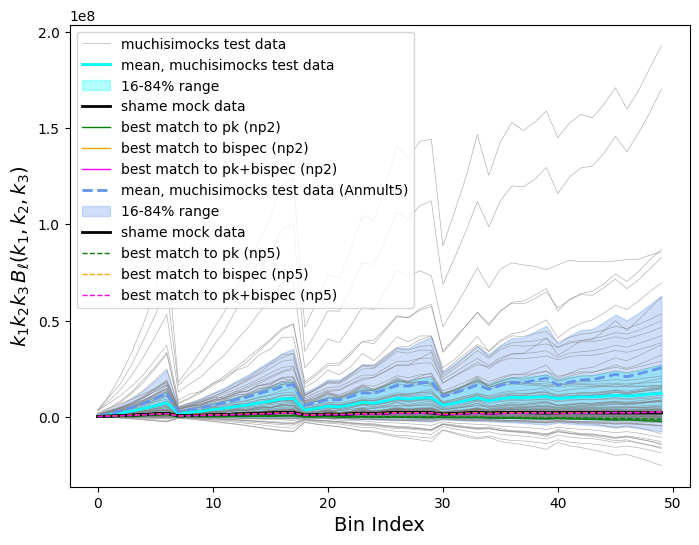

In [23]:
plt.figure(figsize=(8,6))

n_plot = 100
first = True
for i in range(n_plot):
    if first:
        label = 'muchisimocks test data'
        first = False
    else:
        label = None
    plt.plot(range(len(y_bispec[i])), y_bispec[i], color='grey', alpha=0.6, lw=0.5, label=label)

mean = np.mean(y_bispec, axis=0)
p16 = np.percentile(y_bispec, 16, axis=0)
p84 = np.percentile(y_bispec, 84, axis=0)
plt.plot(range(len(mean)), mean, color='cyan', lw=2, label='mean, muchisimocks test data')
plt.fill_between(range(len(mean)), p16, p84, color='cyan', alpha=0.3, label=r'16-84% range')
plt.plot(range(len(bispec_shame)), bispec_shame, color='black', lw=2, label='shame mock data')
plt.plot(range(len(y_bispec[idx_min_pk])), y_bispec[idx_min_pk], color='green', lw=1, label='best match to pk (np2)')
plt.plot(range(len(y_bispec[idx_min_bispec])), y_bispec[idx_min_bispec], color='orange', lw=1, label='best match to bispec (np2)')
plt.plot(range(len(y_bispec[idx_min_pk_bispec])), y_bispec[idx_min_pk_bispec], color='magenta', lw=1, label='best match to pk+bispec (np2)')
plt.plot()

## Anmult p5
mean = np.mean(y_bispec_np5, axis=0)
p16 = np.percentile(y_bispec_np5, 16, axis=0)
p84 = np.percentile(y_bispec_np5, 84, axis=0)
plt.plot(range(len(mean)), mean, color='cornflowerblue', ls='--', lw=2, label='mean, muchisimocks test data (Anmult5)')
plt.fill_between(range(len(mean)), p16, p84, color='cornflowerblue', alpha=0.3, label=r'16-84% range')
plt.plot(range(len(bispec_shame)), bispec_shame, color='black', lw=2, label='shame mock data')
plt.plot(range(len(y_bispec_np5[idx_min_pk_np5])), y_bispec_np5[idx_min_pk_np5], color='green', ls='--', lw=1, label='best match to pk (np5)')
plt.plot(range(len(y_bispec_np5[idx_min_bispec_np5])), y_bispec_np5[idx_min_bispec_np5], color='orange', ls='--', lw=1, label='best match to bispec (np5)')
plt.plot(range(len(y_bispec_np5[idx_min_pk_bispec_np5])), y_bispec_np5[idx_min_pk_bispec_np5], color='magenta', ls='--', lw=1, label='best match to pk+bispec (np5)')
plt.plot()


plt.xlabel(r'Bin Index', fontsize=14)
plt.ylabel(r'$k_1k_2k_3\,B_\ell(k_1,k_2,k_3)$', fontsize=14)
plt.legend(fontsize=10)
#plt.ylim(p16.min()*2, p84.max()*0.8)

(59711.70889793794, 4595707.170184825)

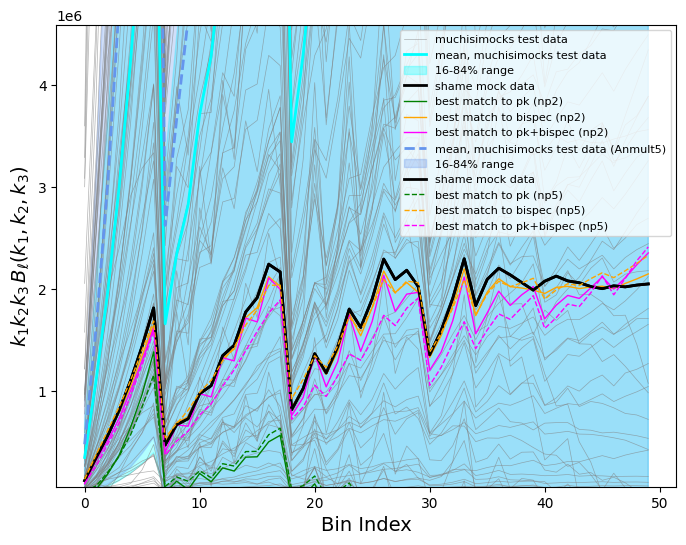

In [24]:
plt.figure(figsize=(8,6))

n_plot = 100
first = True
for i in range(n_plot):
    if first:
        label = 'muchisimocks test data'
        first = False
    else:
        label = None
    plt.plot(range(len(y_bispec[i])), y_bispec[i], color='grey', alpha=0.6, lw=0.5, label=label)

mean = np.mean(y_bispec, axis=0)
p16 = np.percentile(y_bispec, 16, axis=0)
p84 = np.percentile(y_bispec, 84, axis=0)
plt.plot(range(len(mean)), mean, color='cyan', lw=2, label='mean, muchisimocks test data')
plt.fill_between(range(len(mean)), p16, p84, color='cyan', alpha=0.3, label=r'16-84% range')
plt.plot(range(len(bispec_shame)), bispec_shame, color='black', lw=2, label='shame mock data')
plt.plot(range(len(y_bispec[idx_min_pk])), y_bispec[idx_min_pk], color='green', lw=1, label='best match to pk (np2)')
plt.plot(range(len(y_bispec[idx_min_bispec])), y_bispec[idx_min_bispec], color='orange', lw=1, label='best match to bispec (np2)')
plt.plot(range(len(y_bispec[idx_min_pk_bispec])), y_bispec[idx_min_pk_bispec], color='magenta', lw=1, label='best match to pk+bispec (np2)')
plt.plot()

## Anmult p5
mean = np.mean(y_bispec_np5, axis=0)
p16 = np.percentile(y_bispec_np5, 16, axis=0)
p84 = np.percentile(y_bispec_np5, 84, axis=0)
plt.plot(range(len(mean)), mean, color='cornflowerblue', ls='--', lw=2, label='mean, muchisimocks test data (Anmult5)')
plt.fill_between(range(len(mean)), p16, p84, color='cornflowerblue', alpha=0.3, label=r'16-84% range')
plt.plot(range(len(bispec_shame)), bispec_shame, color='black', lw=2, label='shame mock data')
plt.plot(range(len(y_bispec_np5[idx_min_pk_np5])), y_bispec_np5[idx_min_pk_np5], color='green', ls='--', lw=1, label='best match to pk (np5)')
plt.plot(range(len(y_bispec_np5[idx_min_bispec_np5])), y_bispec_np5[idx_min_bispec_np5], color='orange', ls='--', lw=1, label='best match to bispec (np5)')
plt.plot(range(len(y_bispec_np5[idx_min_pk_bispec_np5])), y_bispec_np5[idx_min_pk_bispec_np5], color='magenta', ls='--', lw=1, label='best match to pk+bispec (np5)')
plt.plot()


plt.xlabel(r'Bin Index', fontsize=14)
plt.ylabel(r'$k_1k_2k_3\,B_\ell(k_1,k_2,k_3)$', fontsize=14)
plt.legend(fontsize=8)

plt.ylim(bispec_shame.min()*0.5, bispec_shame.max()*2)

# inference; 1x bias per cosmo

## load training: Anmult p2

In [3]:
data_mode = 'muchisimocks'
tag_params = '_p5_n10000'
tag_biasparams = '_biaszen_p4_n10000'
tag_noise = '_noise_unit_p5_n10000'
tag_Anoise = '_Anmult_p2_n10000'

n_train = 10000
statistics_arr = [['pk'], ['bispec'], ['pk', 'bispec']]
tag_stats_arr = [f'_{"_".join(statistics)}' for statistics in statistics_arr]

# muchisimocks_pk_p5_n10000_biaszen_p4_n10000_ntrain10000
tags_inf = [
             f'_{data_mode}{tag_stats}{tag_params}{tag_biasparams}{tag_noise}{tag_Anoise}_ntrain{n_train}' for tag_stats in tag_stats_arr
            ]
inf_methods = ['sbi']*len(tags_inf)
labels = [utils.get_stat_label(stat) for stat in statistics_arr]
color_pk = '#54afd6'
color_bispec = "#e14e4e"
color_pkbispec = '#b0198f'
colors = [color_pk, color_bispec, color_pkbispec]

In [9]:
# load training set parameters 
params_df, param_dict_fixed, biasparams_df, biasparams_dict_fixed, Anoise_df, Anoise_dict_fixed, random_ints, random_ints_bias = data_loader.load_params(tag_params, tag_biasparams, tag_Anoise=tag_Anoise)

# for muchisimocks, we will probably want to vary the same params as the training data
cosmo_param_names_vary, bias_param_names_vary, noise_param_names_vary = [], [], []
if params_df is not None:
    cosmo_param_names_vary = params_df.columns.tolist()
# TODO should this be test or train?
if biasparams_df is not None:
    bias_param_names_vary = biasparams_df.columns.tolist()
if Anoise_df is not None:
    noise_param_names_vary = Anoise_df.columns.tolist()
param_names_vary = cosmo_param_names_vary + bias_param_names_vary + noise_param_names_vary
param_labels = [utils.param_label_dict[param_name] for param_name in param_names_vary]
print(param_names_vary)

['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl', 'An_homog', 'An_b1']


### Inference results: cosmic variance / fixed cosmo (quijote)

In [20]:
# load fixed-cosmo test set
tag_params_test_fixed = '_quijote_p0_n1000'
tag_biasparams_test_fixed = '_b1000_p0_n1'
tag_noise_fixed = '_noise_unit_quijote_p0_n1000'
tag_Anoise_fixed = '_Anmult_p0_n1'
theta_test_fixed = data_loader.load_theta_test(tag_params_test_fixed, tag_biasparams_test_fixed, 
                                               tag_Anoise_test=tag_Anoise_fixed,
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary,
                                noise_param_names_vary=noise_param_names_vary)
print(theta_test_fixed)
print(len(theta_test_fixed))

# get bounds
_, dict_bounds_cosmo, _ = genp.define_LH_cosmo(tag_params_test_fixed)
_, dict_bounds_bias, _ = genp.define_LH_bias(tag_biasparams_test_fixed)
_, dict_bounds_Anoise, _ = genp.define_LH_Anoise(tag_Anoise_fixed)
extents = {**dict_bounds_cosmo, **dict_bounds_bias, **dict_bounds_Anoise}

tag_Anoise_test _Anmult_p0_n1
['An_homog', 'An_b1']
{'An_homog': 1.0, 'An_b1': 0.0, 'An_b2': 0.0, 'An_bs2': 0.0, 'An_bl': 0.0}
here
11
[0.3175 0.834  0.6711 0.049  0.9624 1.     0.     0.     0.     1.
 0.    ]
11


['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl', 'An_homog', 'An_b1']
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p2_n10000_ntrain10000/samples_test_muchisimocks_pk_quijote_p0_n1000_b1000_p0_n1_noise_unit_quijote_p0_n1000_Anmult_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_bispec_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p2_n10000_ntrain10000/samples_test_muchisimocks_bispec_quijote_p0_n1000_b1000_p0_n1_noise_unit_quijote_p0_n1000_Anmult_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p2_n10000_ntrain10000/samples_test_muchisimocks_pk_bispec_quijote_p0_n1000_b1000_p0_n1_noise_unit_quijote_p0_n1000_Anmult_p0_n1_mean_pred.npy


Parameter b2 in chain $P(k)$ is not constrained


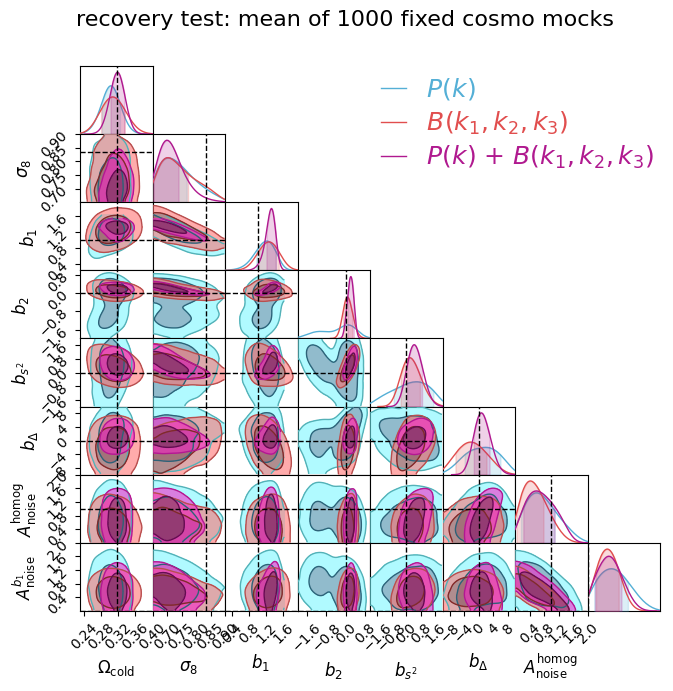

In [21]:
print(param_names_vary)
idx_obs = 0
title = f'recovery test: mean of 1000 fixed cosmo mocks'
tags_stats = [f'_{"_".join(statistics)}' for statistics in statistics_arr]
tags_test = ['_'+data_mode + tag_stats + tag_params_test_fixed + tag_biasparams_test_fixed + tag_noise_fixed + tag_Anoise_fixed + '_mean' for tag_stats in tag_stats_arr]

#tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
# doing utils.biasparam_names_ordered here instead of bias_param_names_vary in case some param sets don't vary all the bias params but we want to show them on the same plot
#param_names_contour = cosmo_param_names_vary + noise_param_names_vary
param_names_contour = ['omega_cold', 'sigma8_cold'] + utils.biasparam_names_ordered + noise_param_names_vary
theta_test_show = theta_test_fixed[[i for i, name in enumerate(param_names_vary) if name in param_names_contour]]

plotter.plot_contours_inf(param_names_contour, idx_obs, theta_test_show, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels=labels,
                        title=title, extents=extents)

### Inference results: shame

In [24]:
# load fixed-cosmo test set
data_mode_test = 'shame'
tag_mock = '_nbar0.00022'
theta_test = data_loader.load_theta_ood(data_mode_test, tag_mock, 
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary, noise_param_names_vary=noise_param_names_vary)
print(theta_test)

# get bounds
_, dict_bounds_cosmo, _ = genp.define_LH_cosmo(tag_params)
_, dict_bounds_bias, _ = genp.define_LH_bias(tag_biasparams)
_, dict_bounds_Anoise, _ = genp.define_LH_Anoise(tag_Anoise)
extents = {**dict_bounds_cosmo, **dict_bounds_bias, **dict_bounds_Anoise}

[ 0.3089      0.81590003  0.6774      0.0486      0.9667      0.47410742
  0.03175373 -0.16940883 -0.82443643         nan         nan]


['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl', 'An_homog', 'An_b1']
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p2_n10000_ntrain10000/samples_test_shame_pk_nbar0.00022_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_bispec_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p2_n10000_ntrain10000/samples_test_shame_bispec_nbar0.00022_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p2_n10000_ntrain10000/samples_test_shame_pk_bispec_nbar0.00022_pred.npy


Parameter bl in chain $P(k)$ is not constrained


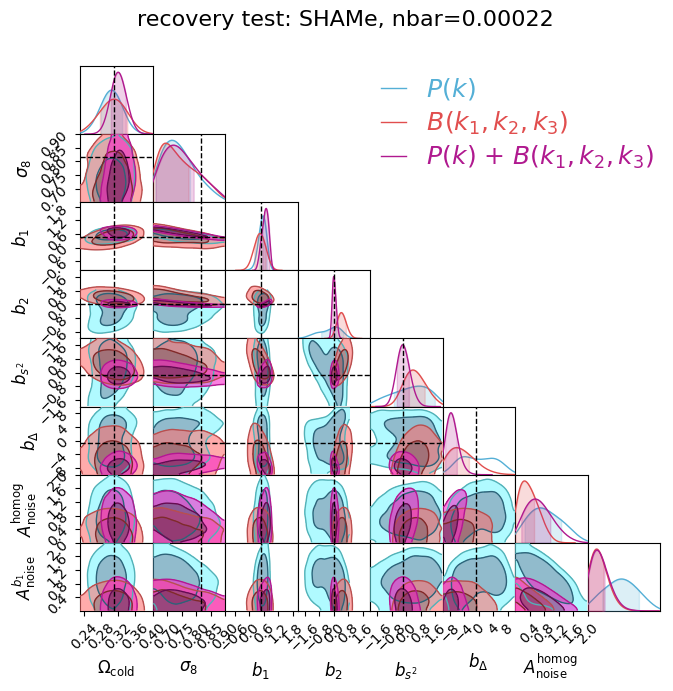

In [26]:
print(param_names_vary)
idx_obs = 0
title = f'recovery test: SHAMe, nbar={tag_mock.split("nbar")[-1]}'
tags_test = ['_'+data_mode_test + tag_stats + tag_mock for tag_stats in tag_stats_arr]

#tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
# doing utils.biasparam_names_ordered here instead of bias_param_names_vary in case some param sets don't vary all the bias params but we want to show them on the same plot
#param_names_contour = cosmo_param_names_vary + noise_param_names_vary
param_names_contour = ['omega_cold', 'sigma8_cold'] + utils.biasparam_names_ordered + noise_param_names_vary
theta_test_show = theta_test[[i for i, name in enumerate(param_names_vary) if name in param_names_contour]]

plotter.plot_contours_inf(param_names_contour, idx_obs, theta_test_show, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels=labels,
                        title=title, extents=extents)

## load training: Anmult p5

In [27]:
data_mode = 'muchisimocks'
tag_params = '_p5_n10000'
tag_biasparams = '_biaszen_p4_n10000'
tag_noise = '_noise_unit_p5_n10000'
tag_Anoise = '_Anmult_p5_n10000'

n_train = 10000
statistics_arr = [['pk'], ['bispec'], ['pk', 'bispec']]
tag_stats_arr = [f'_{"_".join(statistics)}' for statistics in statistics_arr]

# muchisimocks_pk_p5_n10000_biaszen_p4_n10000_ntrain10000
tags_inf = [
             f'_{data_mode}{tag_stats}{tag_params}{tag_biasparams}{tag_noise}{tag_Anoise}_ntrain{n_train}' for tag_stats in tag_stats_arr
            ]
inf_methods = ['sbi']*len(tags_inf)
labels = [utils.get_stat_label(stat) for stat in statistics_arr]
color_pk = '#54afd6'
color_bispec = "#e14e4e"
color_pkbispec = '#b0198f'
colors = [color_pk, color_bispec, color_pkbispec]

In [28]:
# load training set parameters 
params_df, param_dict_fixed, biasparams_df, biasparams_dict_fixed, Anoise_df, Anoise_dict_fixed, random_ints, random_ints_bias = data_loader.load_params(tag_params, tag_biasparams, tag_Anoise=tag_Anoise)

# for muchisimocks, we will probably want to vary the same params as the training data
cosmo_param_names_vary, bias_param_names_vary, noise_param_names_vary = [], [], []
if params_df is not None:
    cosmo_param_names_vary = params_df.columns.tolist()
# TODO should this be test or train?
if biasparams_df is not None:
    bias_param_names_vary = biasparams_df.columns.tolist()
if Anoise_df is not None:
    noise_param_names_vary = Anoise_df.columns.tolist()
param_names_vary = cosmo_param_names_vary + bias_param_names_vary + noise_param_names_vary
param_labels = [utils.param_label_dict[param_name] for param_name in param_names_vary]
print(param_names_vary)

['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl', 'An_homog', 'An_b1', 'An_b2', 'An_bs2', 'An_bl']


### Inference results: cosmic variance / fixed cosmo (quijote)

In [29]:
# load fixed-cosmo test set
tag_params_test_fixed = '_quijote_p0_n1000'
tag_biasparams_test_fixed = '_b1000_p0_n1'
tag_noise_fixed = '_noise_unit_quijote_p0_n1000'
tag_Anoise_fixed = '_Anmult_p0_n1'
theta_test_fixed = data_loader.load_theta_test(tag_params_test_fixed, tag_biasparams_test_fixed, 
                                               tag_Anoise_test=tag_Anoise_fixed,
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary,
                                noise_param_names_vary=noise_param_names_vary)
print(theta_test_fixed)
print(len(theta_test_fixed))

# get bounds
_, dict_bounds_cosmo, _ = genp.define_LH_cosmo(tag_params_test_fixed)
_, dict_bounds_bias, _ = genp.define_LH_bias(tag_biasparams_test_fixed)
_, dict_bounds_Anoise, _ = genp.define_LH_Anoise(tag_Anoise_fixed)
extents = {**dict_bounds_cosmo, **dict_bounds_bias, **dict_bounds_Anoise}

tag_Anoise_test _Anmult_p0_n1
['An_homog', 'An_b1', 'An_b2', 'An_bs2', 'An_bl']
{'An_homog': 1.0, 'An_b1': 0.0, 'An_b2': 0.0, 'An_bs2': 0.0, 'An_bl': 0.0}
here
14
[0.3175 0.834  0.6711 0.049  0.9624 1.     0.     0.     0.     1.
 0.     0.     0.     0.    ]
14


['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl', 'An_homog', 'An_b1', 'An_b2', 'An_bs2', 'An_bl']
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p5_n10000_ntrain10000/samples_test_muchisimocks_pk_quijote_p0_n1000_b1000_p0_n1_noise_unit_quijote_p0_n1000_Anmult_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_bispec_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p5_n10000_ntrain10000/samples_test_muchisimocks_bispec_quijote_p0_n1000_b1000_p0_n1_noise_unit_quijote_p0_n1000_Anmult_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p5_n10000_ntrain10000/samples_test_muchisimocks_pk_bispec_quijote_p0_n1000_b1000_p0_n1_noise_unit_quijote_p0_n1000_Anmult_p0_n1_mean_pred.npy


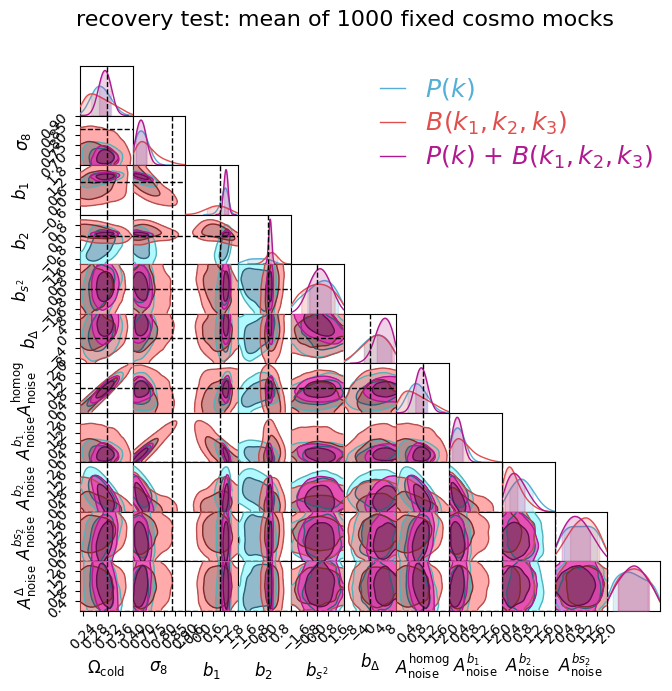

In [30]:
print(param_names_vary)
idx_obs = 0
title = f'recovery test: mean of 1000 fixed cosmo mocks'
tags_stats = [f'_{"_".join(statistics)}' for statistics in statistics_arr]
tags_test = ['_'+data_mode + tag_stats + tag_params_test_fixed + tag_biasparams_test_fixed + tag_noise_fixed + tag_Anoise_fixed + '_mean' for tag_stats in tag_stats_arr]

#tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
# doing utils.biasparam_names_ordered here instead of bias_param_names_vary in case some param sets don't vary all the bias params but we want to show them on the same plot
#param_names_contour = cosmo_param_names_vary + noise_param_names_vary
param_names_contour = ['omega_cold', 'sigma8_cold'] + utils.biasparam_names_ordered + noise_param_names_vary
theta_test_show = theta_test_fixed[[i for i, name in enumerate(param_names_vary) if name in param_names_contour]]

plotter.plot_contours_inf(param_names_contour, idx_obs, theta_test_show, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels=labels,
                        title=title, extents=extents)

### Inference results: shame

In [31]:
# load fixed-cosmo test set
data_mode_test = 'shame'
tag_mock = '_nbar0.00022'
theta_test = data_loader.load_theta_ood(data_mode_test, tag_mock, 
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary, noise_param_names_vary=noise_param_names_vary)
print(theta_test)

# get bounds
_, dict_bounds_cosmo, _ = genp.define_LH_cosmo(tag_params)
_, dict_bounds_bias, _ = genp.define_LH_bias(tag_biasparams)
_, dict_bounds_Anoise, _ = genp.define_LH_Anoise(tag_Anoise)
extents = {**dict_bounds_cosmo, **dict_bounds_bias, **dict_bounds_Anoise}

[ 0.3089      0.81590003  0.6774      0.0486      0.9667      0.47410742
  0.03175373 -0.16940883 -0.82443643         nan         nan         nan
         nan         nan]


['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl', 'An_homog', 'An_b1', 'An_b2', 'An_bs2', 'An_bl']
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p5_n10000_ntrain10000/samples_test_shame_pk_nbar0.00022_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_bispec_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p5_n10000_ntrain10000/samples_test_shame_bispec_nbar0.00022_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n10000_noise_unit_p5_n10000_Anmult_p5_n10000_ntrain10000/samples_test_shame_pk_bispec_nbar0.00022_pred.npy


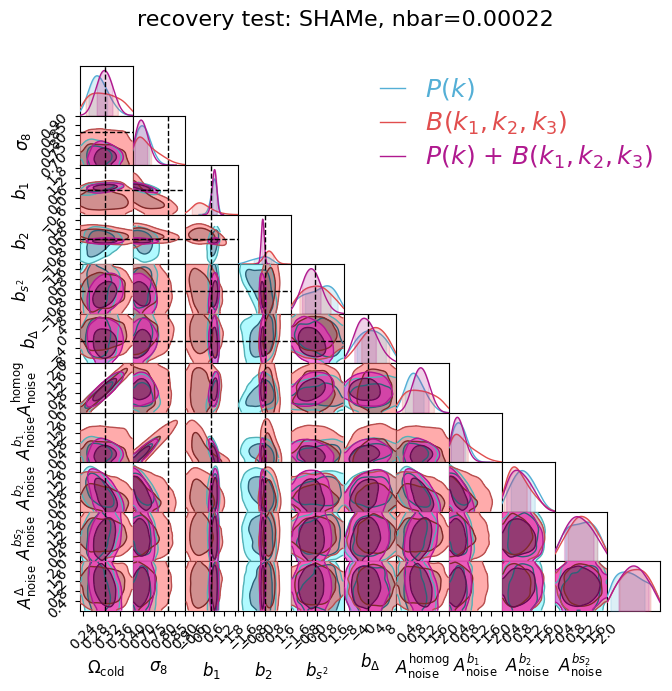

In [32]:
print(param_names_vary)
idx_obs = 0
title = f'recovery test: SHAMe, nbar={tag_mock.split("nbar")[-1]}'
tags_test = ['_'+data_mode_test + tag_stats + tag_mock for tag_stats in tag_stats_arr]

#tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
# doing utils.biasparam_names_ordered here instead of bias_param_names_vary in case some param sets don't vary all the bias params but we want to show them on the same plot
#param_names_contour = cosmo_param_names_vary + noise_param_names_vary
param_names_contour = ['omega_cold', 'sigma8_cold'] + utils.biasparam_names_ordered + noise_param_names_vary
theta_test_show = theta_test[[i for i, name in enumerate(param_names_vary) if name in param_names_contour]]

plotter.plot_contours_inf(param_names_contour, idx_obs, theta_test_show, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels=labels,
                        title=title, extents=extents)

# Inference: 20x bias per cosmo

## load training: Anmult p2

In [16]:
data_mode = 'muchisimocks'
tag_params = '_p5_n10000'
tag_biasparams = '_biaszen_p4_n200000'
tag_noise = '_noise_unit_p5_n10000'
tag_Anoise = '_Anmult_p2_n200000'

n_train = 10000
#statistics_arr = [['pk']]
#statistics_arr = [['pk'], ['bispec']]
statistics_arr = [['pk'], ['bispec'], ['pk', 'bispec']]
tag_stats_arr = [f'_{"_".join(statistics)}' for statistics in statistics_arr]

# muchisimocks_pk_p5_n10000_biaszen_p4_n10000_ntrain10000
tags_inf = [
             f'_{data_mode}{tag_stats}{tag_params}{tag_biasparams}{tag_noise}{tag_Anoise}_ntrain{n_train}' for tag_stats in tag_stats_arr
            ]
inf_methods = ['sbi']*len(tags_inf)
labels = [utils.get_stat_label(stat) for stat in statistics_arr]
color_pk = '#54afd6'
color_bispec = "#e14e4e"
color_pkbispec = '#b0198f'
colors = [color_pk, color_bispec, color_pkbispec]

In [17]:
# load training set parameters 
params_df, param_dict_fixed, biasparams_df, biasparams_dict_fixed, Anoise_df, Anoise_dict_fixed, random_ints, random_ints_bias = data_loader.load_params(tag_params, tag_biasparams, tag_Anoise=tag_Anoise)

# for muchisimocks, we will probably want to vary the same params as the training data
cosmo_param_names_vary, bias_param_names_vary, noise_param_names_vary = [], [], []
if params_df is not None:
    cosmo_param_names_vary = params_df.columns.tolist()
# TODO should this be test or train?
if biasparams_df is not None:
    bias_param_names_vary = biasparams_df.columns.tolist()
if Anoise_df is not None:
    noise_param_names_vary = Anoise_df.columns.tolist()
param_names_vary = cosmo_param_names_vary + bias_param_names_vary + noise_param_names_vary
param_labels = [utils.param_label_dict[param_name] for param_name in param_names_vary]
print(param_names_vary)

['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl', 'An_homog', 'An_b1']


### Inference results: cosmic variance / fixed cosmo (quijote)

In [18]:
# load fixed-cosmo test set
tag_params_test_fixed = '_quijote_p0_n1000'
tag_biasparams_test_fixed = '_b1000_p0_n1'
tag_noise_fixed = '_noise_unit_quijote_p0_n1000'
tag_Anoise_fixed = '_Anmult_p0_n1'
theta_test_fixed = data_loader.load_theta_test(tag_params_test_fixed, tag_biasparams_test_fixed, 
                                               tag_Anoise_test=tag_Anoise_fixed,
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary,
                                noise_param_names_vary=noise_param_names_vary)
print(theta_test_fixed)
print(len(theta_test_fixed))

# get bounds
_, dict_bounds_cosmo, _ = genp.define_LH_cosmo(tag_params_test_fixed)
_, dict_bounds_bias, _ = genp.define_LH_bias(tag_biasparams_test_fixed)
_, dict_bounds_Anoise, _ = genp.define_LH_Anoise(tag_Anoise_fixed)
extents = {**dict_bounds_cosmo, **dict_bounds_bias, **dict_bounds_Anoise}

tag_Anoise_test _Anmult_p0_n1
['An_homog', 'An_b1']
{'An_homog': 1.0, 'An_b1': 0.0, 'An_b2': 0.0, 'An_bs2': 0.0, 'An_bl': 0.0}
here
11
[0.3175 0.834  0.6711 0.049  0.9624 1.     0.     0.     0.     1.
 0.    ]
11


['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl', 'An_homog', 'An_b1']
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_p5_n10000_biaszen_p4_n200000_noise_unit_p5_n10000_Anmult_p2_n200000_ntrain10000/samples_test_muchisimocks_pk_quijote_p0_n1000_b1000_p0_n1_noise_unit_quijote_p0_n1000_Anmult_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_bispec_p5_n10000_biaszen_p4_n200000_noise_unit_p5_n10000_Anmult_p2_n200000_ntrain10000/samples_test_muchisimocks_bispec_quijote_p0_n1000_b1000_p0_n1_noise_unit_quijote_p0_n1000_Anmult_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n200000_noise_unit_p5_n10000_Anmult_p2_n200000_ntrain10000/samples_test_muchisimocks_pk_bispec_quijote_p0_n1000_b1000_p0_n1_noise_unit_quijote_p0_n1000_Anmult_p0_n1_mean_pred.npy


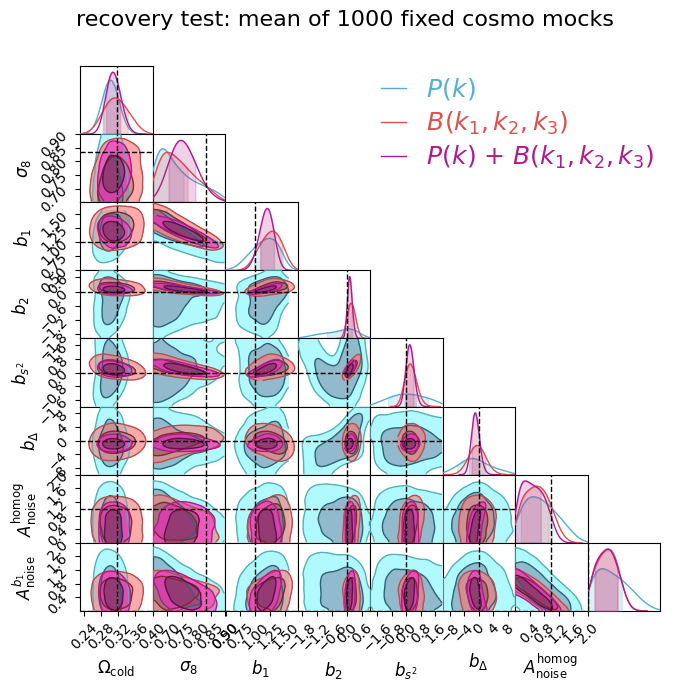

In [19]:
print(param_names_vary)
idx_obs = 0
title = f'recovery test: mean of 1000 fixed cosmo mocks'
tags_stats = [f'_{"_".join(statistics)}' for statistics in statistics_arr]
tags_test = ['_'+data_mode + tag_stats + tag_params_test_fixed + tag_biasparams_test_fixed + tag_noise_fixed + tag_Anoise_fixed + '_mean' for tag_stats in tag_stats_arr]

#tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
# doing utils.biasparam_names_ordered here instead of bias_param_names_vary in case some param sets don't vary all the bias params but we want to show them on the same plot
#param_names_contour = cosmo_param_names_vary + noise_param_names_vary
param_names_contour = ['omega_cold', 'sigma8_cold'] + utils.biasparam_names_ordered + noise_param_names_vary
theta_test_show = theta_test_fixed[[i for i, name in enumerate(param_names_vary) if name in param_names_contour]]

plotter.plot_contours_inf(param_names_contour, idx_obs, theta_test_show, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels=labels,
                        title=title, extents=extents)

### Inference results: shame

In [20]:
# load fixed-cosmo test set
data_mode_test = 'shame'
tag_mock = '_nbar0.00022'
theta_test = data_loader.load_theta_ood(data_mode_test, tag_mock, 
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary, noise_param_names_vary=noise_param_names_vary)
print(theta_test)

# get bounds
_, dict_bounds_cosmo, _ = genp.define_LH_cosmo(tag_params)
_, dict_bounds_bias, _ = genp.define_LH_bias(tag_biasparams)
_, dict_bounds_Anoise, _ = genp.define_LH_Anoise(tag_Anoise)
extents = {**dict_bounds_cosmo, **dict_bounds_bias, **dict_bounds_Anoise}

[ 0.3089      0.81590003  0.6774      0.0486      0.9667      0.47410742
  0.03175373 -0.16940883 -0.82443643         nan         nan]


['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl', 'An_homog', 'An_b1']
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_p5_n10000_biaszen_p4_n200000_noise_unit_p5_n10000_Anmult_p2_n200000_ntrain10000/samples_test_shame_pk_nbar0.00022_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_bispec_p5_n10000_biaszen_p4_n200000_noise_unit_p5_n10000_Anmult_p2_n200000_ntrain10000/samples_test_shame_bispec_nbar0.00022_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n200000_noise_unit_p5_n10000_Anmult_p2_n200000_ntrain10000/samples_test_shame_pk_bispec_nbar0.00022_pred.npy


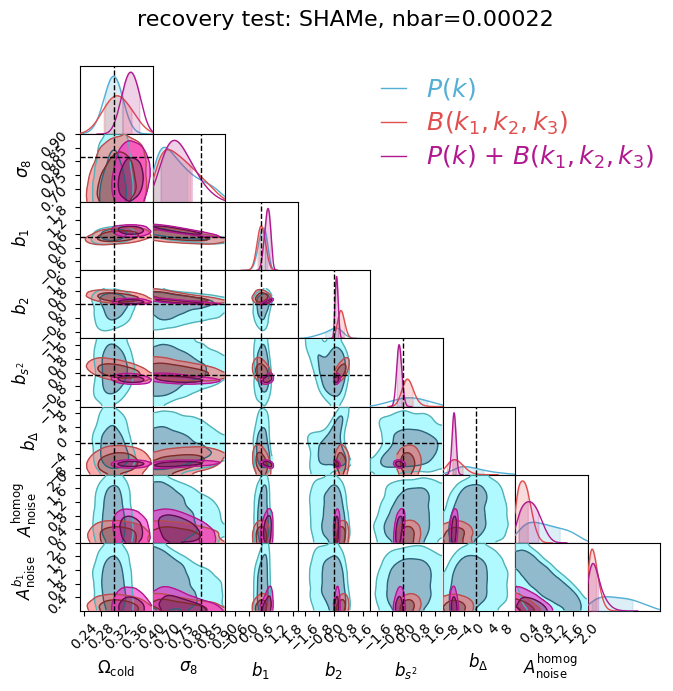

In [21]:
print(param_names_vary)
idx_obs = 0
title = f'recovery test: SHAMe, nbar={tag_mock.split("nbar")[-1]}'
tags_test = ['_'+data_mode_test + tag_stats + tag_mock for tag_stats in tag_stats_arr]

#tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
# doing utils.biasparam_names_ordered here instead of bias_param_names_vary in case some param sets don't vary all the bias params but we want to show them on the same plot
#param_names_contour = cosmo_param_names_vary + noise_param_names_vary
param_names_contour = ['omega_cold', 'sigma8_cold'] + utils.biasparam_names_ordered + noise_param_names_vary
theta_test_show = theta_test[[i for i, name in enumerate(param_names_vary) if name in param_names_contour]]

plotter.plot_contours_inf(param_names_contour, idx_obs, theta_test_show, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels=labels,
                        title=title, extents=extents)

## load training: Anmult p5

In [2]:
data_mode = 'muchisimocks'
tag_params = '_p5_n10000'
tag_biasparams = '_biaszen_p4_n200000'
tag_noise = '_noise_unit_p5_n10000'
tag_Anoise = '_Anmult_p5_n200000'

n_train = 10000
#statistics_arr = [['pk']]
statistics_arr = [['pk'], ['bispec'], ['pk', 'bispec']]
tag_stats_arr = [f'_{"_".join(statistics)}' for statistics in statistics_arr]

# muchisimocks_pk_p5_n10000_biaszen_p4_n10000_ntrain10000
tags_inf = [
             f'_{data_mode}{tag_stats}{tag_params}{tag_biasparams}{tag_noise}{tag_Anoise}_ntrain{n_train}' for tag_stats in tag_stats_arr
            ]
inf_methods = ['sbi']*len(tags_inf)
labels = [utils.get_stat_label(stat) for stat in statistics_arr]
color_pk = '#54afd6'
color_bispec = "#e14e4e"
color_pkbispec = '#b0198f'
colors = [color_pk, color_bispec, color_pkbispec]

In [3]:
# load training set parameters 
params_df, param_dict_fixed, biasparams_df, biasparams_dict_fixed, Anoise_df, Anoise_dict_fixed, random_ints, random_ints_bias = data_loader.load_params(tag_params, tag_biasparams, tag_Anoise=tag_Anoise)

# for muchisimocks, we will probably want to vary the same params as the training data
cosmo_param_names_vary, bias_param_names_vary, noise_param_names_vary = [], [], []
if params_df is not None:
    cosmo_param_names_vary = params_df.columns.tolist()
# TODO should this be test or train?
if biasparams_df is not None:
    bias_param_names_vary = biasparams_df.columns.tolist()
if Anoise_df is not None:
    noise_param_names_vary = Anoise_df.columns.tolist()
param_names_vary = cosmo_param_names_vary + bias_param_names_vary + noise_param_names_vary
param_labels = [utils.param_label_dict[param_name] for param_name in param_names_vary]
print(param_names_vary)

['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl', 'An_homog', 'An_b1', 'An_b2', 'An_bs2', 'An_bl']


### Inference results: cosmic variance / fixed cosmo (quijote)

In [24]:
# load fixed-cosmo test set
tag_params_test_fixed = '_quijote_p0_n1000'
tag_biasparams_test_fixed = '_b1000_p0_n1'
tag_noise_fixed = '_noise_unit_quijote_p0_n1000'
tag_Anoise_fixed = '_Anmult_p0_n1'
theta_test_fixed = data_loader.load_theta_test(tag_params_test_fixed, tag_biasparams_test_fixed, 
                                               tag_Anoise_test=tag_Anoise_fixed,
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary,
                                noise_param_names_vary=noise_param_names_vary)
print(theta_test_fixed)
print(len(theta_test_fixed))

# get bounds
_, dict_bounds_cosmo, _ = genp.define_LH_cosmo(tag_params_test_fixed)
_, dict_bounds_bias, _ = genp.define_LH_bias(tag_biasparams_test_fixed)
_, dict_bounds_Anoise, _ = genp.define_LH_Anoise(tag_Anoise_fixed)
extents = {**dict_bounds_cosmo, **dict_bounds_bias, **dict_bounds_Anoise}

tag_Anoise_test _Anmult_p0_n1
['An_homog', 'An_b1', 'An_b2', 'An_bs2', 'An_bl']
{'An_homog': 1.0, 'An_b1': 0.0, 'An_b2': 0.0, 'An_bs2': 0.0, 'An_bl': 0.0}
here
14
[0.3175 0.834  0.6711 0.049  0.9624 1.     0.     0.     0.     1.
 0.     0.     0.     0.    ]
14


['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl', 'An_homog', 'An_b1', 'An_b2', 'An_bs2', 'An_bl']
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_p5_n10000_biaszen_p4_n200000_noise_unit_p5_n10000_Anmult_p5_n200000_ntrain10000/samples_test_muchisimocks_pk_quijote_p0_n1000_b1000_p0_n1_noise_unit_quijote_p0_n1000_Anmult_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_bispec_p5_n10000_biaszen_p4_n200000_noise_unit_p5_n10000_Anmult_p5_n200000_ntrain10000/samples_test_muchisimocks_bispec_quijote_p0_n1000_b1000_p0_n1_noise_unit_quijote_p0_n1000_Anmult_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n200000_noise_unit_p5_n10000_Anmult_p5_n200000_ntrain10000/samples_test_muchisimocks_pk_bispec_quijote_p0_n1000_b1000_p0_n1_noise_unit_quijote_p0_n1000_Anmult_p0_n1_mean_pred.npy


Parameter b2 in chain $P(k)$ is not constrained


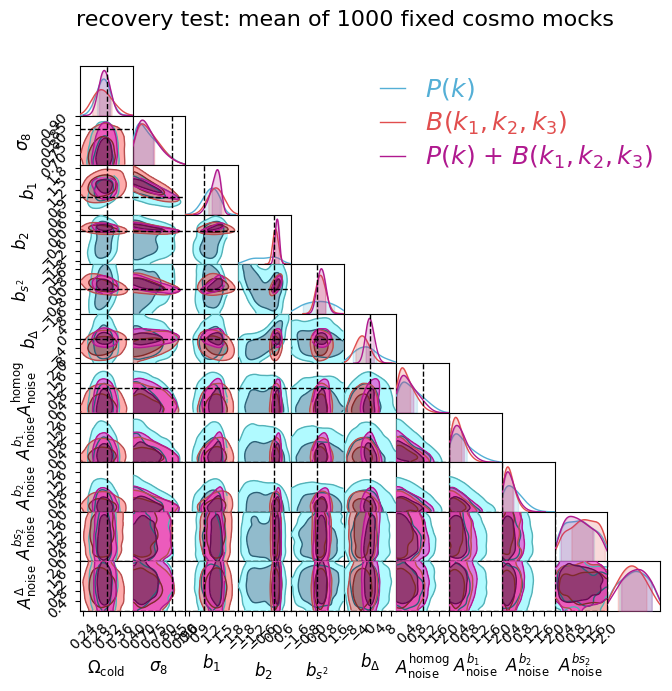

In [25]:
print(param_names_vary)
idx_obs = 0
title = f'recovery test: mean of 1000 fixed cosmo mocks'
tags_stats = [f'_{"_".join(statistics)}' for statistics in statistics_arr]
tags_test = ['_'+data_mode + tag_stats + tag_params_test_fixed + tag_biasparams_test_fixed + tag_noise_fixed + tag_Anoise_fixed + '_mean' for tag_stats in tag_stats_arr]

#tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
# doing utils.biasparam_names_ordered here instead of bias_param_names_vary in case some param sets don't vary all the bias params but we want to show them on the same plot
#param_names_contour = cosmo_param_names_vary + noise_param_names_vary
param_names_contour = ['omega_cold', 'sigma8_cold'] + utils.biasparam_names_ordered + noise_param_names_vary
theta_test_show = theta_test_fixed[[i for i, name in enumerate(param_names_vary) if name in param_names_contour]]

plotter.plot_contours_inf(param_names_contour, idx_obs, theta_test_show, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels=labels,
                        title=title, extents=extents)

### Inference results: shame

In [26]:
# load fixed-cosmo test set
data_mode_test = 'shame'
tag_mock = '_nbar0.00022'
theta_test = data_loader.load_theta_ood(data_mode_test, tag_mock, 
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary, noise_param_names_vary=noise_param_names_vary)
print(theta_test)

# get bounds
_, dict_bounds_cosmo, _ = genp.define_LH_cosmo(tag_params)
_, dict_bounds_bias, _ = genp.define_LH_bias(tag_biasparams)
_, dict_bounds_Anoise, _ = genp.define_LH_Anoise(tag_Anoise)
extents = {**dict_bounds_cosmo, **dict_bounds_bias, **dict_bounds_Anoise}

[ 0.3089      0.81590003  0.6774      0.0486      0.9667      0.47410742
  0.03175373 -0.16940883 -0.82443643         nan         nan         nan
         nan         nan]


['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl', 'An_homog', 'An_b1', 'An_b2', 'An_bs2', 'An_bl']
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_p5_n10000_biaszen_p4_n200000_noise_unit_p5_n10000_Anmult_p5_n200000_ntrain10000/samples_test_shame_pk_nbar0.00022_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_bispec_p5_n10000_biaszen_p4_n200000_noise_unit_p5_n10000_Anmult_p5_n200000_ntrain10000/samples_test_shame_bispec_nbar0.00022_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n200000_noise_unit_p5_n10000_Anmult_p5_n200000_ntrain10000/samples_test_shame_pk_bispec_nbar0.00022_pred.npy


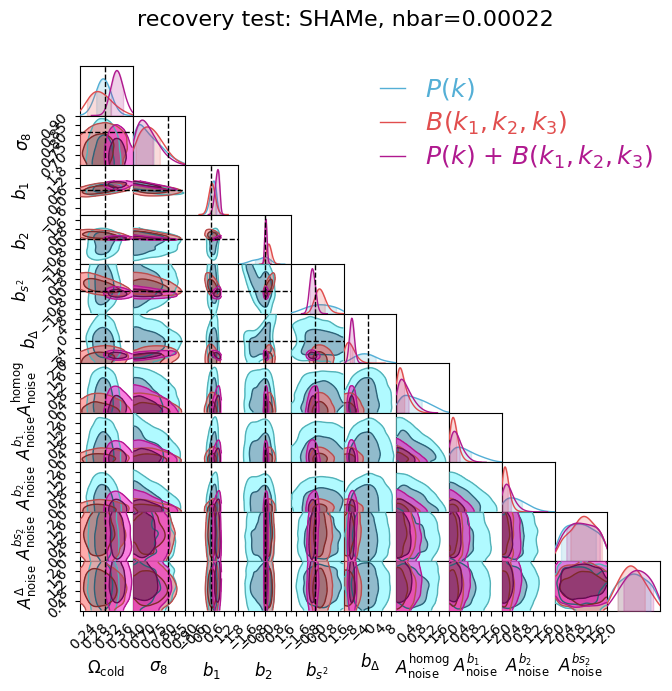

In [27]:
print(param_names_vary)
idx_obs = 0
title = f'recovery test: SHAMe, nbar={tag_mock.split("nbar")[-1]}'
tags_test = ['_'+data_mode_test + tag_stats + tag_mock for tag_stats in tag_stats_arr]

#tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
# doing utils.biasparam_names_ordered here instead of bias_param_names_vary in case some param sets don't vary all the bias params but we want to show them on the same plot
#param_names_contour = cosmo_param_names_vary + noise_param_names_vary
param_names_contour = ['omega_cold', 'sigma8_cold'] + utils.biasparam_names_ordered + noise_param_names_vary
theta_test_show = theta_test[[i for i, name in enumerate(param_names_vary) if name in param_names_contour]]

plotter.plot_contours_inf(param_names_contour, idx_obs, theta_test_show, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels=labels,
                        title=title, extents=extents)

### inference results, coverage

In [4]:
# load test set matched to training sest
tag_params_test = '_test_p5_n1000'
tags_biasparams_test = ['_biaszen_p4_n1000']*len(tags_inf)
tags_noise_test = ['_noise_unit_test_p5_n1000']*len(tags_inf)
tags_Anoise_test = ['_Anmult_p5_n1000']*len(tags_inf)
tags_mask_test = ['', '', '']
tag_datagen_test = ''               

tags_data_test = ['_'+data_mode + tag_stats_arr[i] + tags_mask_test[i] + tag_params_test + tags_biasparams_test[i] + tags_noise_test[i] + tags_Anoise_test[i] + tag_datagen_test for i in range(len(tag_stats_arr))]

for tag_data_test in tags_data_test:
    print(tag_data_test)

_muchisimocks_pk_test_p5_n1000_biaszen_p4_n1000_noise_unit_test_p5_n1000_Anmult_p5_n1000
_muchisimocks_bispec_test_p5_n1000_biaszen_p4_n1000_noise_unit_test_p5_n1000_Anmult_p5_n1000
_muchisimocks_pk_bispec_test_p5_n1000_biaszen_p4_n1000_noise_unit_test_p5_n1000_Anmult_p5_n1000


In [5]:
#param_names_show = cosmo_param_names_vary + utils.biasparam_names_ordered
param_names_show = utils.param_names_all_ordered
#param_names_show = cosmo_param_names_vary + ['b1']
theta_true_arr, theta_pred_arr, vars_pred_arr = [], [], []
covs_pred_arr = [] #note that this will be for all params, not just show, for now
for i, tag_inf in enumerate(tags_inf):

    _theta_test_pred, _covs_test_pred, param_names  = utils.get_moments_test_sbi(tag_inf, tag_test=tags_data_test[i],
                                                                     #param_names=param_names_show
                                                                     )
    theta_test = data_loader.load_theta_test(tag_params_test, tags_biasparams_test[i])
    theta_true_inf, theta_pred_inf, vars_pred_inf = [], [], []
    for param_name_show in param_names_show:
        if param_name_show in param_names:
            idx_pn = list(param_names).index(param_name_show)
            theta_true_inf.append(theta_test[:,idx_pn])
            theta_pred_inf.append(_theta_test_pred[:,idx_pn])
            vars_pred_inf.append(_covs_test_pred[:,idx_pn,idx_pn])
            #covs_pred_arr.append(_covs_test_pred[:,idx_pn,idx_pn])
        else:
            nans = np.full(_theta_test_pred.shape[0], np.nan)
            theta_true_inf.append(nans)
            theta_pred_inf.append(nans)
            vars_pred_inf.append(nans)
            #covs_pred_arr.append(None)

    theta_true_arr.append(np.array(theta_true_inf).T)
    theta_pred_arr.append(np.array(theta_pred_inf).T)
    vars_pred_arr.append(np.array(vars_pred_inf).T)
    covs_pred_arr.append(_covs_test_pred)
    
theta_true_arr = np.array(theta_true_arr)
theta_pred_arr = np.array(theta_pred_arr)
vars_pred_arr = np.array(vars_pred_arr)
covs_pred_arr = np.array(covs_pred_arr)

1000
1000
1000


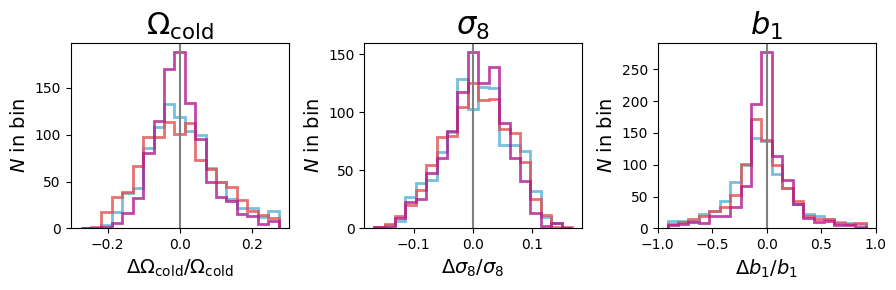

(3, 1000, 9)
omega_cold: 1.302 (0.107 / 0.082)
sigma8_cold: 1.115 (0.056 / 0.050)
b1: 1.144 (5.949 / 5.201)


In [6]:
param_names_key = ['omega_cold', 'sigma8_cold', 'b1']
fracdiffs_arr = plotter.plot_dists_mean_subplots(theta_pred_arr, theta_true_arr, param_names_show, param_names_plot=param_names_key, param_label_dict=utils.param_label_dict,
                        color_arr=colors, label_arr=labels,
                        n_bins=20, alpha=0.8, histtype='step',
                        xlim_auto=False,
                        plot_cdf=False)
print(fracdiffs_arr.shape)
for param_name in param_names_key:
    std_fracdiffs_pk = np.std(fracdiffs_arr[0,:,param_names_show.index(param_name)])
    std_fracdiffs_pk_bispec = np.std(fracdiffs_arr[2,:,param_names_show.index(param_name)])
    improvement = std_fracdiffs_pk / std_fracdiffs_pk_bispec
    print(f'{param_name}: {improvement:.3f} ({std_fracdiffs_pk:.3f} / {std_fracdiffs_pk_bispec:.3f})')
                        

# noiseless, for comparison

In [12]:
data_mode = 'muchisimocks'
tag_params = '_p5_n10000'
tag_biasparams = '_biaszen_p4_n200000'
tag_noise = None
tag_Anoise = None

n_train = 10000
statistics_arr = [['pk'], ['bispec'], ['pk', 'bispec']]
tag_stats_arr = [f'_{"_".join(statistics)}' for statistics in statistics_arr]

# muchisimocks_pk_p5_n10000_biaszen_p4_n10000_ntrain10000
if tag_noise is None:
    tags_inf = [f'_{data_mode}{tag_stats}{tag_params}{tag_biasparams}_ntrain{n_train}' for tag_stats in tag_stats_arr]
else:
    tags_inf = [f'_{data_mode}{tag_stats}{tag_params}{tag_biasparams}{tag_noise}{tag_Anoise}_ntrain{n_train}' for tag_stats in tag_stats_arr]
    
inf_methods = ['sbi']*len(tags_inf)
labels = [utils.get_stat_label(stat) for stat in statistics_arr]
color_pk = '#54afd6'
color_bispec = "#e14e4e"
color_pkbispec = '#b0198f'
colors = [color_pk, color_bispec, color_pkbispec]

In [13]:
# load training set parameters 
params_df, param_dict_fixed, biasparams_df, biasparams_dict_fixed, Anoise_df, Anoise_dict_fixed, random_ints, random_ints_bias = data_loader.load_params(tag_params, tag_biasparams, tag_Anoise=tag_Anoise)

# for muchisimocks, we will probably want to vary the same params as the training data
cosmo_param_names_vary, bias_param_names_vary, noise_param_names_vary = [], [], []
if params_df is not None:
    cosmo_param_names_vary = params_df.columns.tolist()
# TODO should this be test or train?
if biasparams_df is not None:
    bias_param_names_vary = biasparams_df.columns.tolist()
if Anoise_df is not None:
    noise_param_names_vary = Anoise_df.columns.tolist()
param_names_vary = cosmo_param_names_vary + bias_param_names_vary + noise_param_names_vary
param_labels = [utils.param_label_dict[param_name] for param_name in param_names_vary]
print(param_names_vary)

['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl']


### Inference results: cosmic variance / fixed cosmo (quijote)

In [15]:
# load fixed-cosmo test set
tag_params_test_fixed = '_quijote_p0_n1000'
tag_biasparams_test_fixed = '_b1000_p0_n1'
tag_noise_fixed = None
tag_Anoise_fixed = None
theta_test_fixed = data_loader.load_theta_test(tag_params_test_fixed, tag_biasparams_test_fixed, 
                                               tag_Anoise_test=tag_Anoise_fixed,
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary,
                                noise_param_names_vary=noise_param_names_vary)
print(theta_test_fixed)
print(len(theta_test_fixed))

# get bounds
_, dict_bounds_cosmo, _ = genp.define_LH_cosmo(tag_params_test_fixed)
_, dict_bounds_bias, _ = genp.define_LH_bias(tag_biasparams_test_fixed)
_, dict_bounds_Anoise, _ = genp.define_LH_Anoise(tag_Anoise_fixed)
extents = {**dict_bounds_cosmo, **dict_bounds_bias, **dict_bounds_Anoise}

tag_Anoise_test None
[]
{}
9
[0.3175 0.834  0.6711 0.049  0.9624 1.     0.     0.     0.    ]
9


['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl']
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_p5_n10000_biaszen_p4_n200000_ntrain10000/samples_test_muchisimocks_pk_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_bispec_p5_n10000_biaszen_p4_n200000_ntrain10000/samples_test_muchisimocks_bispec_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n200000_ntrain10000/samples_test_muchisimocks_pk_bispec_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy


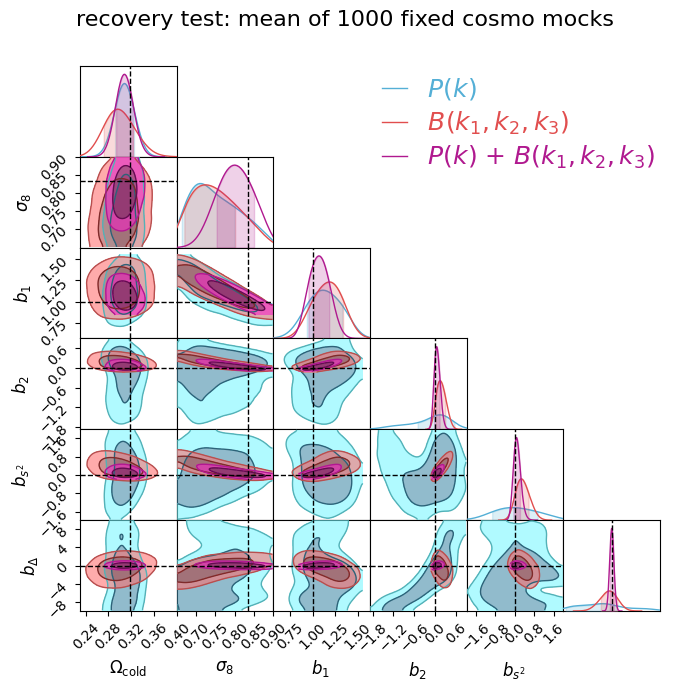

In [16]:
print(param_names_vary)
idx_obs = 0
title = f'recovery test: mean of 1000 fixed cosmo mocks'
tags_stats = [f'_{"_".join(statistics)}' for statistics in statistics_arr]
if tag_noise_fixed is None:
    tags_test = ['_'+data_mode + tag_stats + tag_params_test_fixed + tag_biasparams_test_fixed + '_mean' for tag_stats in tag_stats_arr]
else:
    tags_test = ['_'+data_mode + tag_stats + tag_params_test_fixed + tag_biasparams_test_fixed + tag_noise_fixed + tag_Anoise_fixed + '_mean' for tag_stats in tag_stats_arr]

#tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
# doing utils.biasparam_names_ordered here instead of bias_param_names_vary in case some param sets don't vary all the bias params but we want to show them on the same plot
#param_names_contour = cosmo_param_names_vary + noise_param_names_vary
param_names_contour = ['omega_cold', 'sigma8_cold'] + utils.biasparam_names_ordered + noise_param_names_vary
theta_test_show = theta_test_fixed[[i for i, name in enumerate(param_names_vary) if name in param_names_contour]]

plotter.plot_contours_inf(param_names_contour, idx_obs, theta_test_show, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels=labels,
                        title=title, extents=extents)

### inference results: coverage set

In [14]:
# load test set matched to training sest
tag_params_test = '_test_p5_n1000'
tags_biasparams_test = ['_biaszen_p4_n1000']*len(tags_inf)
tags_noise_test = None
tags_Anoise_test = None
tags_mask_test = ['', '', '']
tag_datagen_test = ''               

tags_data_test = ['_'+data_mode + tag_stats_arr[i] + tags_mask_test[i] + tag_params_test + tags_biasparams_test[i] + tag_datagen_test for i in range(len(tag_stats_arr))]

for tag_data_test in tags_data_test:
    print(tag_data_test)

_muchisimocks_pk_test_p5_n1000_biaszen_p4_n1000
_muchisimocks_bispec_test_p5_n1000_biaszen_p4_n1000
_muchisimocks_pk_bispec_test_p5_n1000_biaszen_p4_n1000


In [15]:
#param_names_show = cosmo_param_names_vary + utils.biasparam_names_ordered
param_names_show = utils.param_names_all_ordered
#param_names_show = cosmo_param_names_vary + ['b1']
theta_true_arr, theta_pred_arr, vars_pred_arr = [], [], []
covs_pred_arr = [] #note that this will be for all params, not just show, for now
for i, tag_inf in enumerate(tags_inf):

    _theta_test_pred, _covs_test_pred, param_names  = utils.get_moments_test_sbi(tag_inf, tag_test=tags_data_test[i],
                                                                     #param_names=param_names_show
                                                                     )
    theta_test = data_loader.load_theta_test(tag_params_test, tags_biasparams_test[i])
    theta_true_inf, theta_pred_inf, vars_pred_inf = [], [], []
    for param_name_show in param_names_show:
        if param_name_show in param_names:
            idx_pn = list(param_names).index(param_name_show)
            theta_true_inf.append(theta_test[:,idx_pn])
            theta_pred_inf.append(_theta_test_pred[:,idx_pn])
            vars_pred_inf.append(_covs_test_pred[:,idx_pn,idx_pn])
            #covs_pred_arr.append(_covs_test_pred[:,idx_pn,idx_pn])
        else:
            nans = np.full(_theta_test_pred.shape[0], np.nan)
            theta_true_inf.append(nans)
            theta_pred_inf.append(nans)
            vars_pred_inf.append(nans)
            #covs_pred_arr.append(None)

    theta_true_arr.append(np.array(theta_true_inf).T)
    theta_pred_arr.append(np.array(theta_pred_inf).T)
    vars_pred_arr.append(np.array(vars_pred_inf).T)
    covs_pred_arr.append(_covs_test_pred)
    
theta_true_arr = np.array(theta_true_arr)
theta_pred_arr = np.array(theta_pred_arr)
vars_pred_arr = np.array(vars_pred_arr)
covs_pred_arr = np.array(covs_pred_arr)

1000
1000
1000


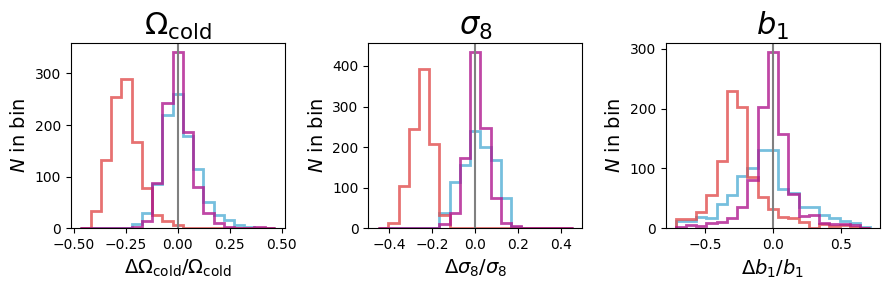

(3, 1000, 9)
omega_cold: 1.298 (0.089 / 0.068)
sigma8_cold: 1.487 (0.074 / 0.050)
b1: 3.617 (7.060 / 1.952)


In [16]:
param_names_key = ['omega_cold', 'sigma8_cold', 'b1']
fracdiffs_arr = plotter.plot_dists_mean_subplots(theta_pred_arr, theta_true_arr, param_names_show, param_names_plot=param_names_key, param_label_dict=utils.param_label_dict,
                        color_arr=colors, label_arr=labels,
                        n_bins=20, alpha=0.8, histtype='step',
                        xlim_auto=False,
                        plot_cdf=False)
print(fracdiffs_arr.shape)
for param_name in param_names_key:
    std_fracdiffs_pk = np.std(fracdiffs_arr[0,:,param_names_show.index(param_name)])
    std_fracdiffs_pk_bispec = np.std(fracdiffs_arr[2,:,param_names_show.index(param_name)])
    improvement = std_fracdiffs_pk / std_fracdiffs_pk_bispec
    print(f'{param_name}: {improvement:.3f} ({std_fracdiffs_pk:.3f} / {std_fracdiffs_pk_bispec:.3f})')
                        

### retry

In [3]:
data_mode = 'muchisimocks'
tag_params = '_p5_n10000'
#tag_biasparams = '_biaszen_p4_n10000'
#tag_biasparams = '_biaszen_p4_n100000'
tag_biasparams = '_biaszen_p4_n200000'
n_train = 10000
statistics_arr = [['pk'], ['bispec'], ['pk', 'bispec']]
tag_stats_arr = [f'_{"_".join(statistics)}' for statistics in statistics_arr]

# muchisimocks_pk_p5_n10000_biaszen_p4_n10000_ntrain10000
tags_inf = [
             f'_{data_mode}{tag_stats}{tag_params}{tag_biasparams}_ntrain{n_train}' for tag_stats in tag_stats_arr
            ]
inf_methods = ['sbi']*len(tags_inf)
labels = [utils.get_stat_label(stat) for stat in statistics_arr]
color_pk = '#54afd6'
color_bispec = "#e14e4e"
color_pkbispec = '#b0198f'
colors = [color_pk, color_bispec, color_pkbispec]

In [10]:
tags_inf

['_muchisimocks_pk_p5_n10000_biaszen_p4_n200000_ntrain10000',
 '_muchisimocks_bispec_p5_n10000_biaszen_p4_n200000_ntrain10000',
 '_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n200000_ntrain10000']

In [4]:
# load training set parameters 
params_df, param_dict_fixed, biasparams_df, biasparams_dict_fixed, Anoise_df, Anoise_dict_fixed, random_ints, random_ints_bias = data_loader.load_params(tag_params, tag_biasparams)

# for muchisimocks, we will probably want to vary the same params as the training data
cosmo_param_names_vary, bias_param_names_vary = [], []
if params_df is not None:
    cosmo_param_names_vary = params_df.columns.tolist()
# TODO should this be test or train?
if biasparams_df is not None:
    bias_param_names_vary = biasparams_df.columns.tolist()
param_names_vary = cosmo_param_names_vary + bias_param_names_vary
param_labels = [utils.param_label_dict[param_name] for param_name in param_names_vary]

In [5]:
# load test set matched to training sest
tag_params_test = '_test_p5_n1000'
tags_biasparams_test = ['_biaszen_p4_n1000']*len(tags_inf)
tag_datagen_test = ''               

tags_data_test = ['_'+data_mode + tag_stats + tag_params_test + tags_biasparams_test[i] + tag_datagen_test for i, tag_stats in enumerate(tag_stats_arr)]

for tag_data_test in tags_data_test:
    print(tag_data_test)

_muchisimocks_pk_test_p5_n1000_biaszen_p4_n1000
_muchisimocks_bispec_test_p5_n1000_biaszen_p4_n1000
_muchisimocks_pk_bispec_test_p5_n1000_biaszen_p4_n1000


In [6]:
#param_names_show = cosmo_param_names_vary + utils.biasparam_names_ordered
param_names_show = utils.param_names_all_ordered
#param_names_show = cosmo_param_names_vary + ['b1']
theta_true_arr, theta_pred_arr, vars_pred_arr = [], [], []
covs_pred_arr = [] #note that this will be for all params, not just show, for now
for i, tag_inf in enumerate(tags_inf):

    _theta_test_pred, _covs_test_pred, param_names  = utils.get_moments_test_sbi(tag_inf, tag_test=tags_data_test[i],
                                                                     #param_names=param_names_show
                                                                     )
    theta_test = data_loader.load_theta_test(tag_params_test, tags_biasparams_test[i])
    theta_true_inf, theta_pred_inf, vars_pred_inf = [], [], []
    for param_name_show in param_names_show:
        if param_name_show in param_names:
            idx_pn = list(param_names).index(param_name_show)
            theta_true_inf.append(theta_test[:,idx_pn])
            theta_pred_inf.append(_theta_test_pred[:,idx_pn])
            vars_pred_inf.append(_covs_test_pred[:,idx_pn,idx_pn])
            #covs_pred_arr.append(_covs_test_pred[:,idx_pn,idx_pn])
        else:
            nans = np.full(_theta_test_pred.shape[0], np.nan)
            theta_true_inf.append(nans)
            theta_pred_inf.append(nans)
            vars_pred_inf.append(nans)
            #covs_pred_arr.append(None)

    theta_true_arr.append(np.array(theta_true_inf).T)
    theta_pred_arr.append(np.array(theta_pred_inf).T)
    vars_pred_arr.append(np.array(vars_pred_inf).T)
    covs_pred_arr.append(_covs_test_pred)
    
theta_true_arr = np.array(theta_true_arr)
theta_pred_arr = np.array(theta_pred_arr)
vars_pred_arr = np.array(vars_pred_arr)
covs_pred_arr = np.array(covs_pred_arr)

1000
1000
1000


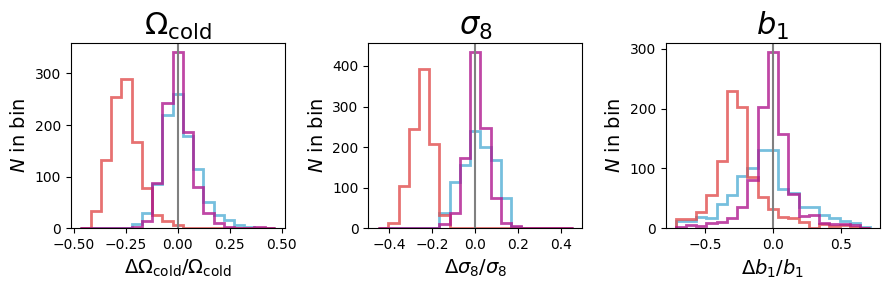

array([[[ 2.57833751e-02,  1.55545412e-02, -2.59928320e-02, ...,
          3.09556805e-02,  2.78752454e-03,  1.30603192e+00],
        [-8.59647879e-02, -6.32164660e-02, -4.20889576e-02, ...,
         -7.53700421e-01, -7.75490507e-02, -1.57090757e+00],
        [-1.76028414e-03,  3.16287485e-03,  1.23156308e-01, ...,
         -4.84087304e-03, -2.52683422e-01, -1.13988773e-02],
        ...,
        [ 5.70826916e-02,  3.18590063e-02, -5.94086403e-04, ...,
         -8.06173611e-02, -6.20516852e-01,  4.40311884e-01],
        [-7.68836216e-02,  3.23578445e-02,  6.73382499e-02, ...,
          5.48449108e-02, -1.04100867e+00,  9.64170484e-01],
        [-2.46637176e-02,  1.46631946e-01, -1.06830412e-01, ...,
         -1.62578305e-01, -7.57852251e+01, -4.60662328e+00]],

       [[-3.02412749e-01, -2.56787949e-01, -2.32395804e-01, ...,
         -7.05116120e-02, -3.89911375e-01,  1.42301963e+00],
        [-3.25690927e-01, -3.37927539e-01, -2.85943493e-01, ...,
         -1.00736840e-01, -1.75476468e

In [9]:

param_names_key = ['omega_cold', 'sigma8_cold', 'b1']
plotter.plot_dists_mean_subplots(theta_pred_arr, theta_true_arr, param_names_show, param_names_plot=param_names_key, param_label_dict=utils.param_label_dict,
                        color_arr=colors, label_arr=labels,
                        n_bins=20, alpha=0.8, histtype='step',
                        xlim_auto=False,
                        plot_cdf=False)

# check forward model with Anmult

In [25]:
data_mode_test = 'shame'
tag_mock = '_nbar0.00022'
tag_data_train = None # this is used for mask; we get it below 
statistics = ['pk', 'bispec']
k_mock, y_mock, y_err_mock = data_loader.load_data_ood(data_mode_test, statistics, tag_mock, tag_data=tag_data_train)

Loaded pk with shape (30,)
Loaded pk data with shape (30,)
No tag_data provided, so not masking data
Loaded bispec with shape (50,)
Loaded bispec data with shape (50,)
No tag_data provided, so not masking data


In [26]:
dir_mocks = f'/scratch/kstoreyf/muchisimocks/muchisimocks_lib_ood/shame'
subdir_prefix = 'mock'
idx_mock = 0
fn_fields = f'{dir_mocks}/{subdir_prefix}{idx_mock}/bias_fields_eul_deconvolved_{idx_mock}.npy'
bias_terms_eul = np.load(fn_fields)

In [27]:
param_dict = data_loader.load_params_ood('shame', tag_mock)
cosmo = utils.get_cosmo(param_dict)
bias_vector = [param_dict[name] for name in utils.biasparam_names_ordered]

In [28]:
n_grid = 128
n_grid_orig = 512
box_size = 1000.0 # muchisimocks size for forward model

In [29]:
rng = np.random.default_rng(seed=42)
noise_field_unit = rng.standard_normal((n_grid, n_grid, n_grid))

In [30]:
#bs = np.concatenate(([1.0], bias_vector))
#tracer_field_ff_det = np.sum([bs[i] * bias_terms_eul[i] for i in range(len(bs))], axis=0) / n_grid_orig**3
tracer_field = utils.get_tracer_field(bias_terms_eul, bias_vector, 
                     noise_field=None, A_noise=None, n_grid_norm=n_grid_orig)

In [31]:
print([param_dict[pn] for pn in utils.cosmo_param_names_ordered])
print([param_dict[pn] for pn in utils.biasparam_names_ordered])

[0.30889999999999995, 0.8159000277519226, 0.6774, 0.0486, 0.9667]
[0.47410742, 0.03175373, -0.16940883, -0.82443643]


In [32]:
print(theta[idx_min_pk])
print(theta_np5[idx_min_pk_np5])

[ 0.30976913  0.66889608  0.66329908  0.04892242  0.94551305  0.62944236
 -1.55920699  0.97170445  5.87139922  0.7743071   1.52931622]
[ 0.32074417  0.65070133  0.74772608  0.05655072  0.93365775  0.582125
 -1.29637078  0.30678329  1.2733968   1.06757847  0.00561062  1.47726078
  1.65507226  0.30350545]


In [33]:
print(theta[idx_min_bispec])
print(theta_np5[idx_min_bispec_np5])

[0.28669602 0.69953173 0.61943229 0.0418656  0.983265   0.35423278
 0.70874516 0.73976412 2.37220469 0.19599029 0.66066939]
[ 0.33502735  0.66221647  0.624899    0.04013732  0.94986385  0.82196024
  0.30655971 -1.20888654  4.19317195  1.23561587  0.09773172  0.24898998
  0.01373152  0.66364111]


In [34]:
print(theta[idx_min_pk_bispec])
print(theta_np5[idx_min_pk_bispec_np5])

[ 0.36068223  0.75404476  0.65589759  0.04591986  0.97515367  0.59434292
 -0.03402389  1.59707788 -2.53605423  1.3324316   0.15777465]
[ 0.34905959  0.69245591  0.61055333  0.04465923  0.97268721  0.67305476
 -0.14548578 -0.9773879  -1.57970578  1.40070103  0.33964729  0.10553334
  0.46592345  1.17082687]


In [35]:
idxs_min_pk_bispec_np5 = np.argsort(chi2_values_pk_bispec_np5)[:10]
print(idxs_min_pk_bispec_np5)

[2316 7094 5680 8894 1584 3657 4446 5835  197 7705]


In [36]:
print(theta_np5[idxs_min_pk_bispec_np5])

[[ 0.34905959  0.69245591  0.61055333  0.04465923  0.97268721  0.67305476
  -0.14548578 -0.9773879  -1.57970578  1.40070103  0.33964729  0.10553334
   0.46592345  1.17082687]
 [ 0.38316032  0.69348496  0.63101883  0.05932309  0.93562976  0.75329828
  -0.24609898  1.03106901  7.06118862  1.80188616  0.3478797   0.3101883
   1.93230929  0.34732809]
 [ 0.3075595   0.77549348  0.64366462  0.04623118  0.92542875  0.29498554
  -0.24108372 -0.72286865  3.6070077   0.91246468  1.00394782  0.43664621
   0.62311775  0.12063899]
 [ 0.29765727  0.67320975  0.7474072   0.04858829  0.97532223  0.67096243
  -0.48449045  1.34915893  1.70206867  0.79596792  0.185678    1.47407195
   0.85882876  1.22938292]
 [ 0.35434392  0.65221514  0.69064373  0.05588285  0.93080139  0.96637177
  -0.64333478  1.22713963  4.74657238  1.46286968  0.01772114  0.90643727
   1.58828482  0.24003089]
 [ 0.38965615  0.65843876  0.65412352  0.04320995  0.92608522  0.97948625
   0.11741298 -0.15848496  4.72190853  1.87830766  0

In [37]:
# As_noise_bestfit = np.array(list(theta[idx_min_pk_bispec][-2:]) + [0,0,0])
# As_noise_np5_bestfit = theta_np5[idx_min_pk_bispec_np5][-5:]
# print('best-fit Anoise (pk+bispec, np2): ', As_noise_bestfit)
# print('best-fit Anoise (pk+bispec, np5): ', As_noise_np5_bestfit)

In [49]:
idx_min_np5 = idxs_min_pk_bispec_np5[0]

In [50]:
As_noise_np5_bestfit = theta_np5[idx_min_np5][-5:]
print('best-fit Anoise (pk+bispec, np5): ', As_noise_np5_bestfit)

best-fit Anoise (pk+bispec, np5):  [1.40070103 0.33964729 0.10553334 0.46592345 1.17082687]


In [64]:
data_mode_test = 'shame'
tag_mock = '_nbar0.00022'
theta_test_np5 = data_loader.load_theta_ood(data_mode_test, tag_mock, 
                                cosmo_param_names_vary=utils.cosmo_param_names_ordered, 
                                bias_param_names_vary=utils.biasparam_names_ordered, 
                                noise_param_names_vary=utils.noiseparam_names_ordered)
print(theta_test_np5)

[ 0.3089      0.81590003  0.6774      0.0486      0.9667      0.47410742
  0.03175373 -0.16940883 -0.82443643         nan         nan         nan
         nan         nan]


In [111]:
# Extract true parameters and filter theta_np5 within 10% tolerance
theta_true = theta_test_np5[:-len(utils.noiseparam_names_ordered)]
tolerance = 0.5

# Find samples where all parameters are within 10% of theta_true
theta_np5_cb = theta_np5[:, :-len(utils.noiseparam_names_ordered)]
i_params = [0,1,5,6]
within_tol = np.all(np.abs(theta_np5_cb[:, i_params] - theta_true[i_params]) / np.abs(theta_true[i_params]) <= tolerance, axis=1)
idxs_within_tol = np.where(within_tol)[0]

# Get 10 best chi2 values within tolerance
if len(idxs_within_tol) > 0:
    idxs_min = idxs_within_tol[np.argsort(chi2_values_pk_bispec_np5[idxs_within_tol])[:10]]
    print(f"Samples within {tolerance*100}%: {len(idxs_within_tol)}")
    print(f"Best 10 indices: {idxs_min}")
    print(f"Chi2 values: {chi2_values_pk_bispec_np5[idxs_min]}")
    print(f"Compare to min chi2: {np.min(chi2_values_pk_bispec_np5)}")
    print(f"Best match parameters:\n{theta_np5[idxs_min[0]]}")
else:
    print(f"No samples within {tolerance*100}% tolerance")

Samples within 50.0%: 14
Best 10 indices: [4898 8770 7379 9290 2606 2828 6181 8507 8021 6643]
Chi2 values: [ 0.62138638  1.04915215  1.61365074  1.85815988  2.41676588  2.51352808
  4.16761321  7.53676362 10.9343144  14.47339887]
Compare to min chi2: 0.25184035293914175
Best match parameters:
[ 0.28070056  0.6791976   0.65841082  0.05487723  0.95682187  0.49330988
  0.04348506 -0.94302195 -8.33170806  0.5964772   0.2335808   0.58410823
  1.48772345  0.81826385]


In [112]:
As_noise_np5_bestfit = theta_np5[idxs_min[0]][-5:]
print('best-fit Anoise (pk+bispec, np5): ', As_noise_np5_bestfit)

best-fit Anoise (pk+bispec, np5):  [0.5964772  0.2335808  0.58410823 1.48772345 0.81826385]


In [113]:
import gc
gc.collect()

2141

In [114]:
tracer_field_noisy = utils.get_tracer_field(bias_terms_eul, bias_vector, 
                     noise_field=noise_field_unit, A_noise=As_noise_np5_bestfit, n_grid_norm=n_grid_orig)
#tracer_field_ff_noise = np.sum([As_noise[i] * noise_field_unit * bias_terms_eul[i] for i in range(len(As_noise))], axis=0) / n_grid_orig**3

In [115]:
pk_obj = cs.compute_pk(tracer_field, cosmo, box_size, n_threads=1, fn_stat=None)

Computing pk, using n_grid =  128


2026-01-03 05:38:27,608 bacco.statistics : Computing the power spectrum with ngrid=128 and interlacing=False
2026-01-03 05:38:27,675 bacco.statistics :  ...done in 0.0674 s


bacco.power : boxsize 1000.000000; ngrid 128; nthreads 1; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=0 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=0 deconvolve_grid2=0
bacco.power : total mass 1 (grid1) 1 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.013404 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.042046 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000147 secs
bacco.power : Deallocating arrays


In [116]:
pk_obj_noisy = cs.compute_pk(tracer_field_noisy, cosmo, box_size, n_threads=1, fn_stat=None)

Computing pk, using n_grid =  128


2026-01-03 05:38:28,051 bacco.statistics : Computing the power spectrum with ngrid=128 and interlacing=False
2026-01-03 05:38:28,117 bacco.statistics :  ...done in 0.0662 s


bacco.power : boxsize 1000.000000; ngrid 128; nthreads 1; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=0 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=0 deconvolve_grid2=0
bacco.power : total mass 1.00096 (grid1) 1.00096 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.013405 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.041342 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000120 secs
bacco.power : Deallocating arrays


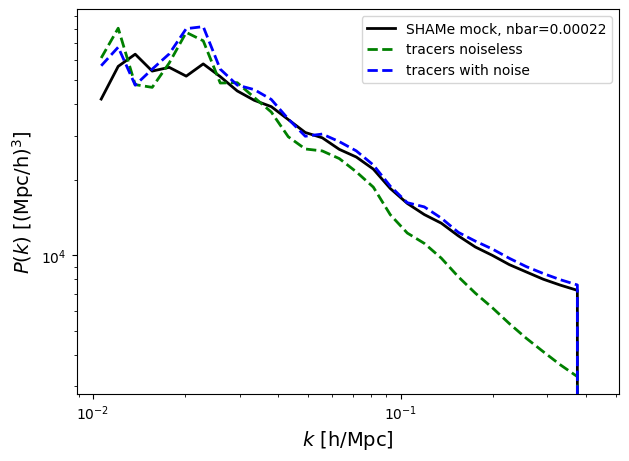

In [117]:
plt.figure(figsize=(7,5))
colors = ['magenta', 'red', 'orange']

label = f'SHAMe mock, nbar={tag_mock.split("nbar")[-1]}'
plt.plot(k_mock[0], y_mock[0], color='black', label=label, lw=2)

label_muchisimocks = 'muchisimocks with parameters\nof SHAMe truth'
label_noise = 'noise field'
label_noiseamp = 'estimated noise amplitude from nbar'

plt.plot(pk_obj['k'], pk_obj['pk'], color='green', ls='--', label='tracers noiseless', lw=2)
plt.plot(pk_obj_noisy['k'], pk_obj_noisy['pk'], color='blue', ls='--', label='tracers with noise', lw=2)

#plt.plot(pk_obj_pos['k'], pk_obj_pos['pk']/n_grid_mock**6, color=colors[i], label='from positions', lw=1.4, alpha=0.5)
#plt.plot(pk_obj_noiseless['k'], pk_obj_noiseless['pk'], color='grey', ls=':', label='muchisimocks but noiseless', lw=2)
#plt.fill_between(pk_obj_noiseless['k'][mask], pk_obj_noiseless['pk'][mask] - err_lo, pk_obj_noiseless['pk'][mask] + err_hi, color='grey', alpha=0.3, label=r'16-84% range, fixed cosmo test set')

plt.xscale('log')
plt.yscale('log') 
plt.xlabel(r'$k$ [h/Mpc]', fontsize=14)
plt.ylabel(r'$P(k)$ [(Mpc/h)$^3$]', fontsize=14)

plt.legend(fontsize=10, loc='upper right')

In [118]:
base = cs.setup_bispsec(box_size, n_grid, n_threads=1)


# Dimensions: [1.00e+03, 1.00e+03, 1.00e+03] Mpc/h
# Center: [0.00e+00, 0.00e+00, 0.00e+00] Mpc/h
# Line-of-sight: global
# Fourier-space grid: [128, 128, 128]
# Fundamental frequency: [0.006, 0.006, 0.006] h/Mpc
# Nyquist frequency: [0.402, 0.402, 0.402] h/Mpc
# Pixel window: none
# Using fftw backend
PolyBin3D setup time: 0.15 s


In [119]:
bspec, bk_corr = cs.compute_bispectrum(base, tracer_field)


Binning: 7 bins in [0.010, 0.400] h/Mpc
Squezed binning: 7 bins in [0.010, 0.400] h/Mpc
l-max: 1
N_bins: 50
Mask: constant
Computing degeneracy factor
Computing ideal Fisher matrix


In [120]:
bspec_noisy, bk_corr_noisy = cs.compute_bispectrum(base, tracer_field_noisy)


Binning: 7 bins in [0.010, 0.400] h/Mpc
Squezed binning: 7 bins in [0.010, 0.400] h/Mpc
l-max: 1
N_bins: 50
Mask: constant
Computing degeneracy factor
Computing ideal Fisher matrix


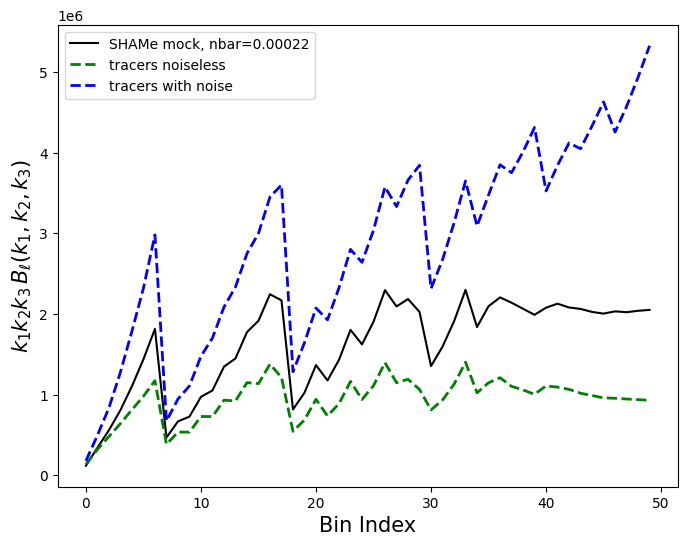

In [121]:
plt.figure(figsize=(8,6))

# ks & norm same for all
k123 = bspec.get_ks()
weight = k123.prod(axis=0)

norm = n_grid**3
#norm_mock = n_grid_mock**3
#print(norm, norm_mock)

label = f'SHAMe mock, nbar={tag_mock.split("nbar")[-1]}'
label_muchisimocks = 'muchisimocks with parameters\nof SHAMe truth'
label_muchisimocks_noiseless = 'muchisimocks but noiseless'

plt.plot(y_mock[1], color='black', label=label)
plt.plot(norm**3 * weight*bk_corr['b0'], color='green', ls='--', lw=2, label='tracers noiseless')
plt.plot(norm**3 * weight*bk_corr_noisy['b0'], color='blue', ls='--', lw=2, label='tracers with noise')

plt.xlabel(r'Bin Index',fontsize=15)
plt.ylabel(r'$k_1k_2k_3\,B_\ell(k_1,k_2,k_3)$',fontsize=15)
plt.legend(fontsize=10)
        